# Contour and Surface Plots

Nipun Batra  
2024-01-21

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Retina mode
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
from latexify import latexify, format_axes

In [3]:
latexify(columns=2, fig_height=4.5)

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch

def create_XYZ(f):
    # Generate data
    x = np.linspace(-5, 5, 100)
    y = np.linspace(-5, 5, 100)
    X, Y = np.meshgrid(x, y)
    
    # Convert to PyTorch tensors
    X_torch = torch.from_numpy(X)
    Y_torch = torch.from_numpy(Y)

    # Evaluate the function
    Z = f(X_torch, Y_torch)
    return X, Y, Z, X_torch, Y_torch

def create_contour(X, Y, Z, ax2, alpha, scatter_pts=None, filled=True, levels=10, mark_levels=False):
    if filled:
        scatter_color='white'
        contour = ax2.contourf(X, Y, Z.detach().numpy(), levels=levels, cmap='magma', alpha=alpha)
    else:
        scatter_color='black'
        contour = ax2.contour(X, Y, Z.detach().numpy(), levels=levels, cmap='magma', alpha=alpha)
    if scatter_pts is not None:
        ax2.scatter(scatter_pts[0], scatter_pts[1], s=10, c=scatter_color)
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    ax2.set_title('Contour Plot')
    

    # Add a colorbar in between the subplots
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    cbar = plt.colorbar(contour, cax=cax)
    return ax2, contour

def plot_surface_and_contour(f, function_name, uv = None, stride=4, alpha=1, scatter_pts=None, filled=True, levels=10):
    X, Y, Z, X_torch, Y_torch = create_XYZ(f)

    # Create the single figure with two subplots
    fig = plt.figure()

    # Plot the 3D surface on the first subplot
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.plot_surface(X, Y, Z.detach().numpy(), cmap='magma', edgecolor='none', alpha=alpha)  # Remove grid lines
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('z')
    ax1.grid(False)
    ax1.xaxis.pane.fill = False
    ax1.yaxis.pane.fill = False
    ax1.zaxis.pane.fill = False
    ax1.view_init(elev=30, azim=30)
    ax1.set_title('Surface Plot')
    if scatter_pts is not None:
        ax1.scatter(scatter_pts[0], scatter_pts[1], f(scatter_pts[0], scatter_pts[1]), s=100, c='black')
    

    # Plot the contour plot on the second subplot
    ax2 = fig.add_subplot(122, aspect='equal')  # Set 1:1 aspect ratio
    
    ax2, contour = create_contour(X, Y, Z, ax2, alpha, scatter_pts, filled, levels)
    file_name = f"../figures/mml/contour-{function_name}.pdf"
    if uv is not None:
        u = uv[0](X_torch, Y_torch)
        v = uv[1](X_torch, Y_torch)
        # Quiver plot for gradient
        ax2.quiver(X[::stride, ::stride], Y[::stride, ::stride], u[::stride, ::stride].detach().numpy(),
                   v[::stride, ::stride].detach().numpy(), scale=140)
        # for c in contour, set alpha
        for c in contour.collections:
            c.set_alpha(0.5)
        
        
        file_name = f"../figures/mml/contour-{function_name}-with-gradient.pdf"
        

    
    # Save the figure
    plt.tight_layout(pad=1.0, w_pad=1.0)
    fig.savefig(file_name, bbox_inches="tight")

# Example usage:
# Define your function f(x, y) and its gradient g(x, y)
#f = lambda x, y: x**2 + y**2
#g = lambda x, y: (2*x, 2*y)
#plot_surface_and_contour(f, "x_squared_plus_y_squared", uv=(lambda x, y: 2*x, lambda x, y: 2*y))


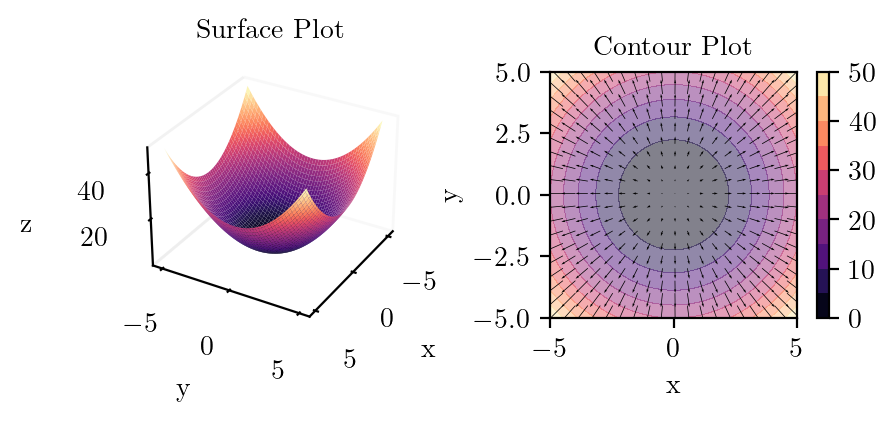

In [62]:
plot_surface_and_contour(lambda x, y: x**2 + y**2, "x_squared_plus_y_squared_quiver", 
                         uv=(lambda x, y: 2*x, lambda x, y: 2*y)
                         ,stride=5)

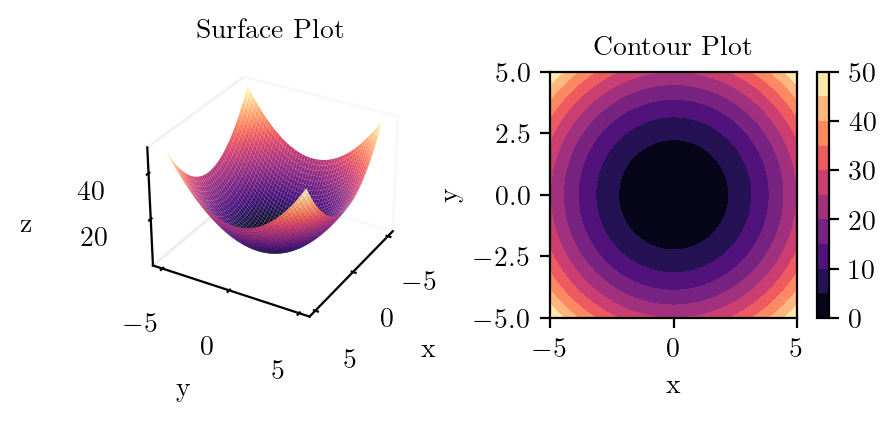

In [63]:
plot_surface_and_contour(lambda x, y: x**2 + y**2, "x_squared_plus_y_squared")


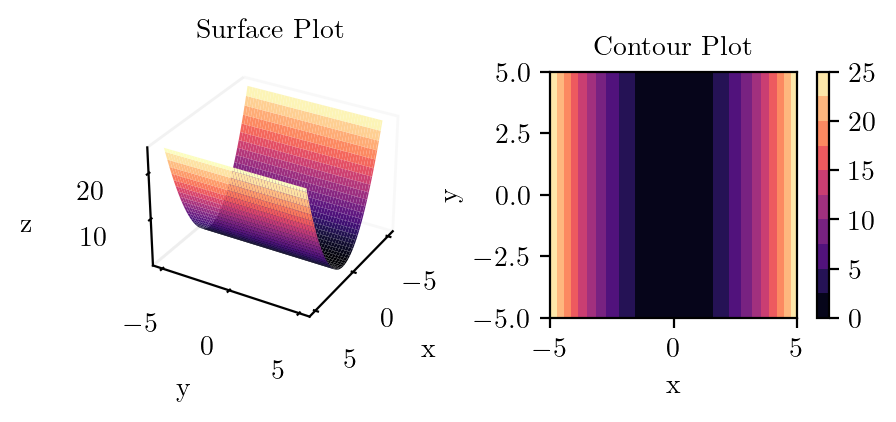

In [64]:
plot_surface_and_contour(lambda x, y: x**2, "x_squared")


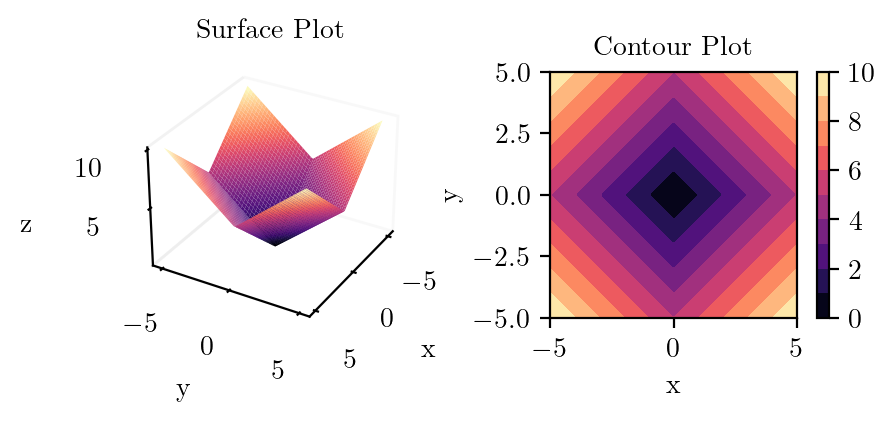

In [41]:
plot_surface_and_contour(lambda x, y: torch.abs(x) + torch.abs(y), "mod_x_plus_mod_y")


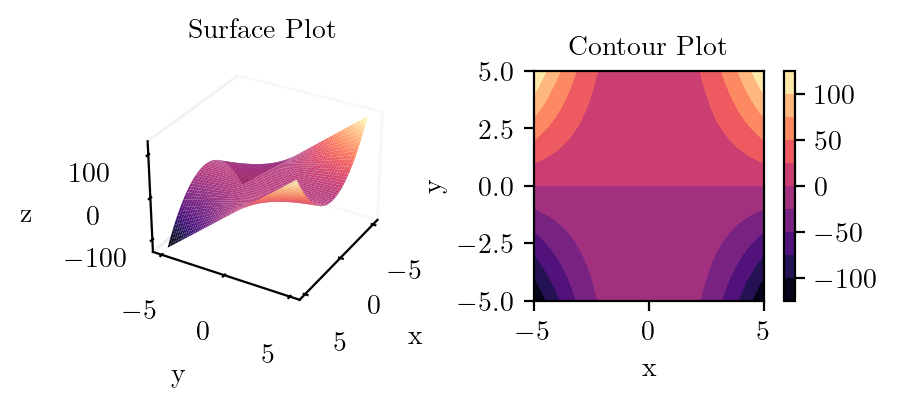

In [42]:
plot_surface_and_contour(lambda x, y: (x**2) * y, "x_square_times_y")


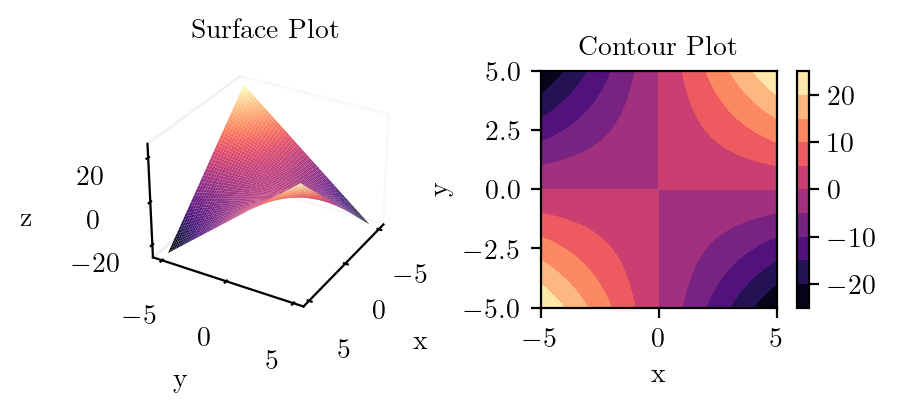

In [43]:
plot_surface_and_contour(lambda x, y: x * y, "x_times_y")


In [11]:
def f(x, y):
    return (14 + 3*x**2 +14*y**2 -12*x - 28*y + 12*x*y)/3

x0, y0 = torch.tensor(4.0), torch.tensor(0.0)



In [12]:
del_x, del_y = torch.func.grad(f, argnums=(0, 1))(x0, y0)
print(del_x, del_y)

tensor(4.) tensor(6.6667)

tensor(3.6000) tensor(-0.6667)
tensor(3.5467) tensor(-0.5511)
tensor(3.4578) tensor(-0.5221)
tensor(3.3751) tensor(-0.4846)
tensor(3.2939) tensor(-0.4490)
tensor(3.2147) tensor(-0.4141)
tensor(3.1374) tensor(-0.3802)
tensor(3.0620) tensor(-0.3470)
tensor(2.9884) tensor(-0.3146)
tensor(2.9165) tensor(-0.2830)
tensor(2.8464) tensor(-0.2522)
tensor(2.7780) tensor(-0.2221)
tensor(2.7112) tensor(-0.1927)
tensor(2.6461) tensor(-0.1640)
tensor(2.5824) tensor(-0.1360)
tensor(2.5204) tensor(-0.1087)
tensor(2.4598) tensor(-0.0821)
tensor(2.4006) tensor(-0.0560)
tensor(2.3429) tensor(-0.0307)
tensor(2.2866) tensor(-0.0059)

tensor(2.2316) tensor(0.0183)
tensor(2.1780) tensor(0.0419)
tensor(2.1256) tensor(0.0649)
tensor(2.0745) tensor(0.0874)
tensor(2.0247) tensor(0.1093)
tensor(1.9760) tensor(0.1308)
tensor(1.9285) tensor(0.1517)
tensor(1.8821) tensor(0.1720)
tensor(1.8369) tensor(0.1919)
tensor(1.7927) tensor(0.2114)
tensor(1.7496) tensor(0.2303)
tensor(1.7076) tensor(0.2488)
tensor(1.6665) tensor(0.2669)
tensor(1.6265) tensor(0.2845)
tensor(1.5874) tensor(0.3017)
tensor(1.5492) tensor(0.3185)
tensor(1.5120) tensor(0.3349)
tensor(1.4756) tensor(0.3509)
tensor(1.4401) tensor(0.3665)
tensor(1.4055) tensor(0.3817)
tensor(1.3717) tensor(0.3966)
tensor(1.3388) tensor(0.4111)
tensor(1.3066) tensor(0.4252)
tensor(1.2752) tensor(0.4391)
tensor(1.2445) tensor(0.4525)
tensor(1.2146) tensor(0.4657)
tensor(1.1854) tensor(0.4785)
tensor(1.1569) tensor(0.4911)
tensor(1.1291) tensor(0.5033)
tensor(1.1020) tensor(0.5153)

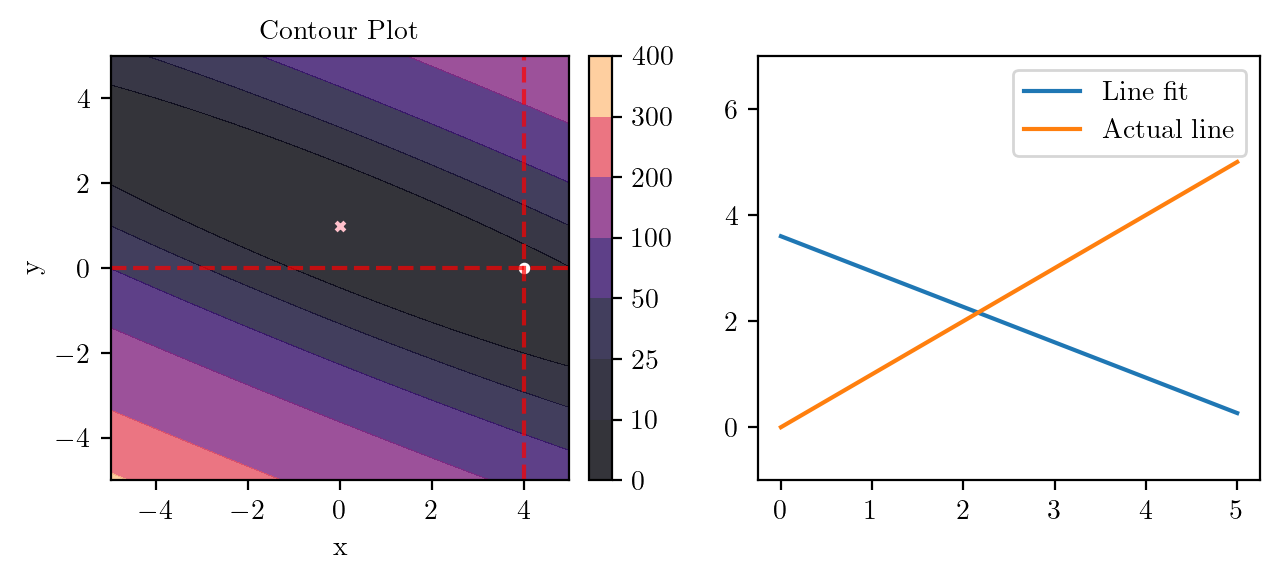

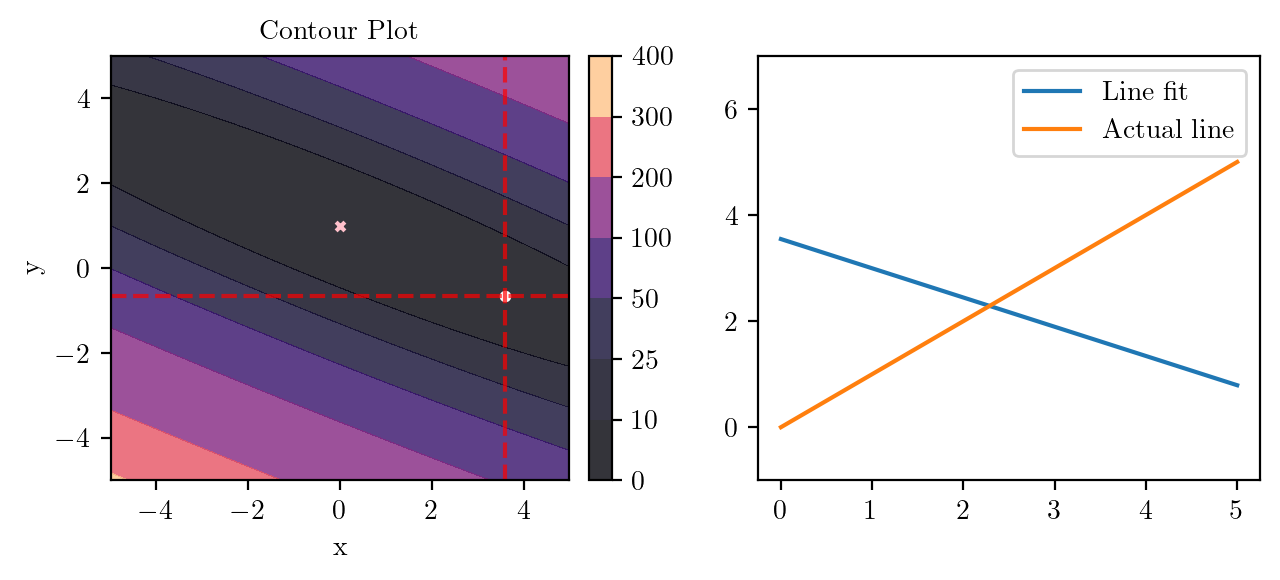

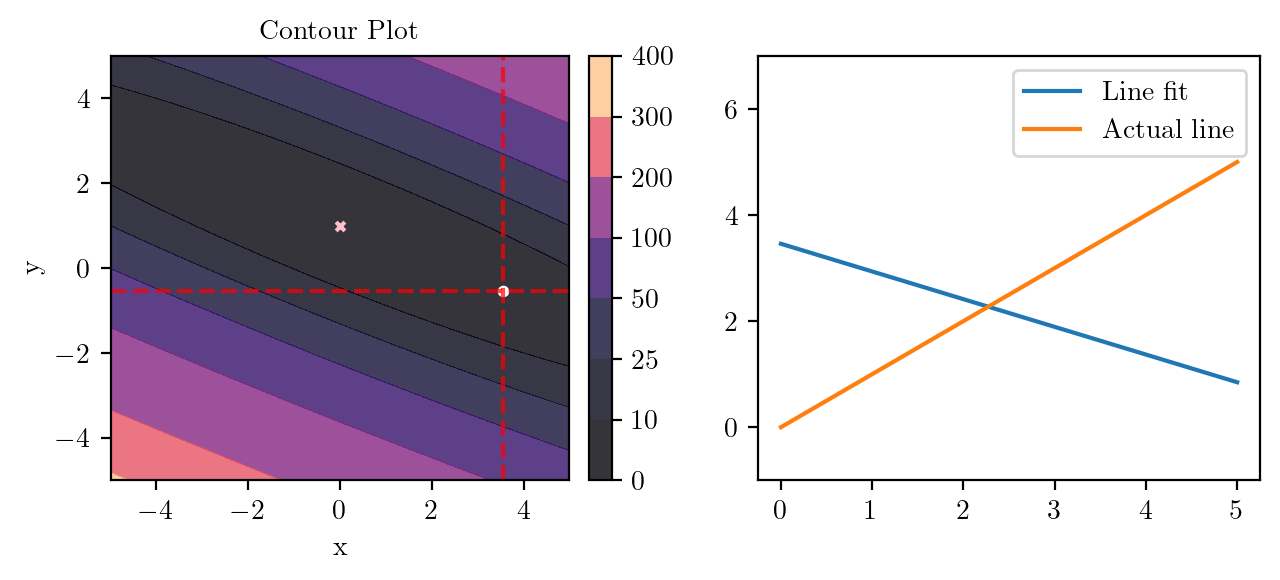

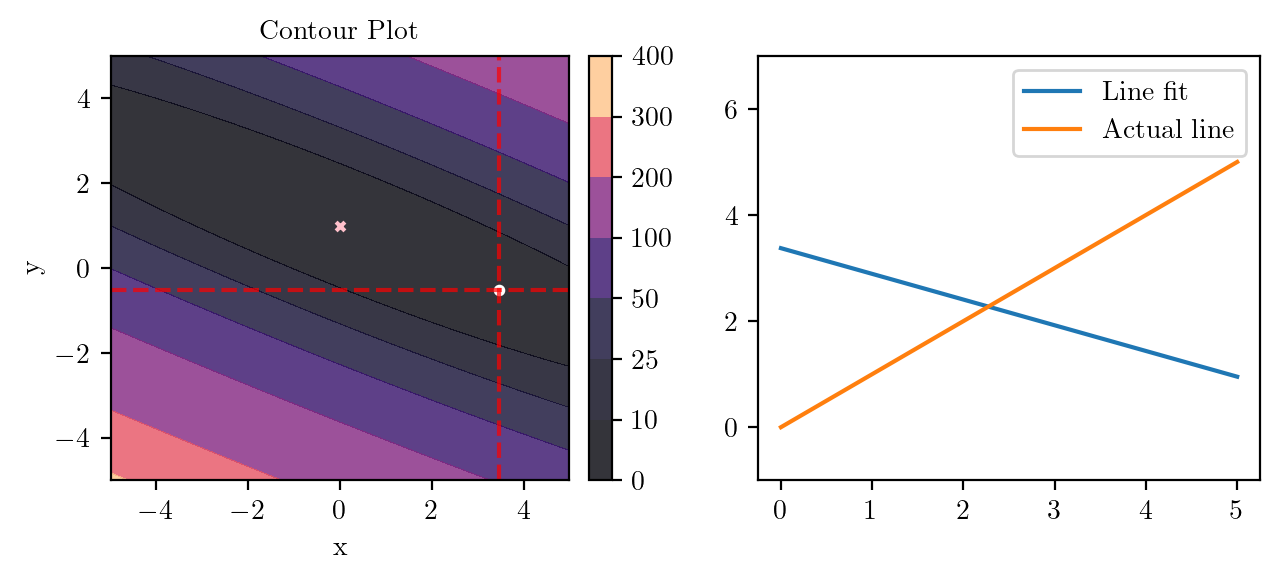

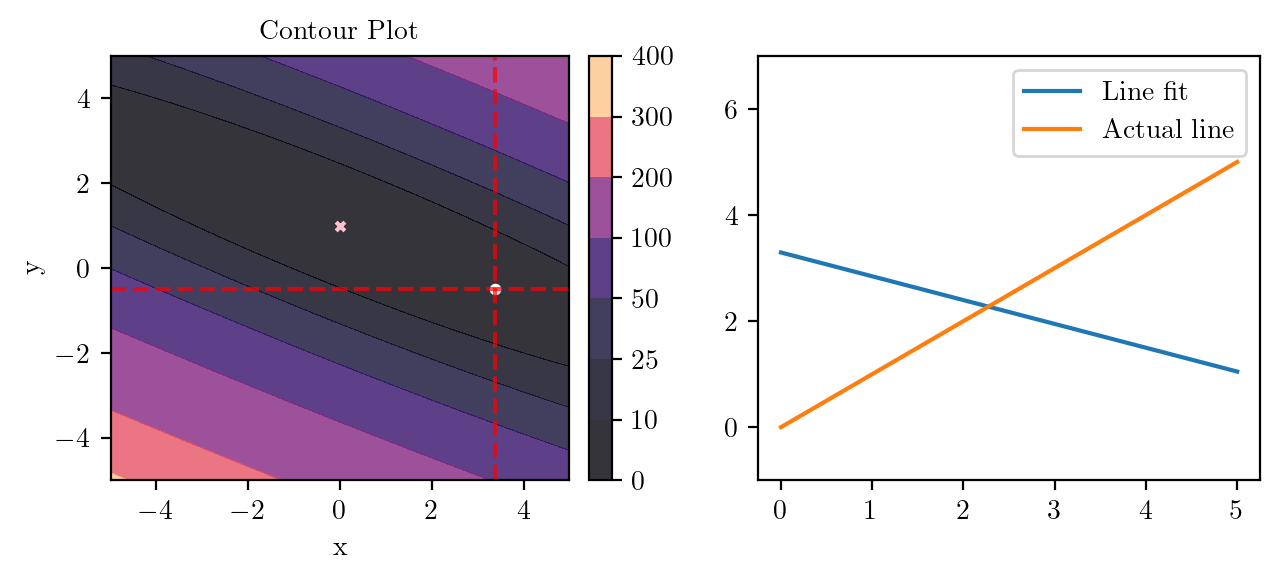

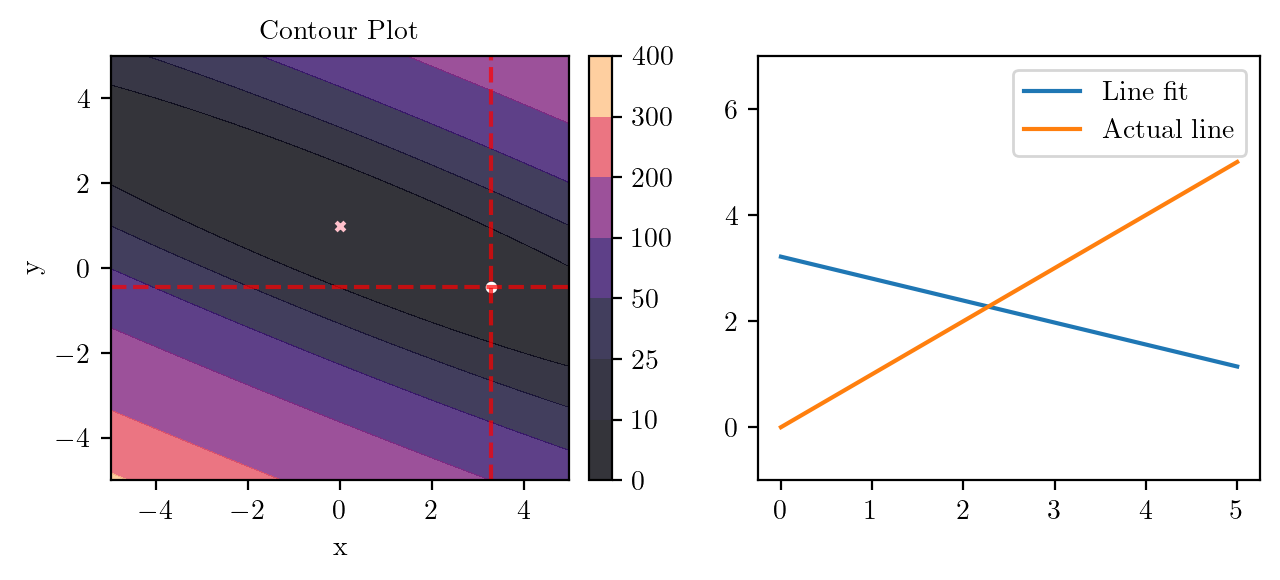

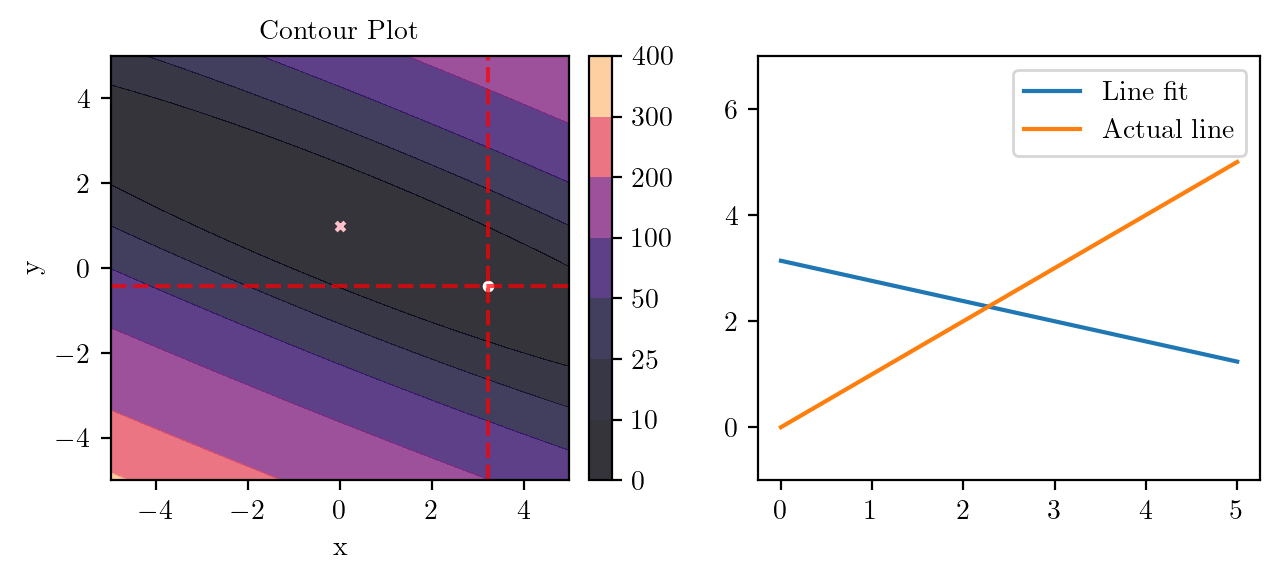

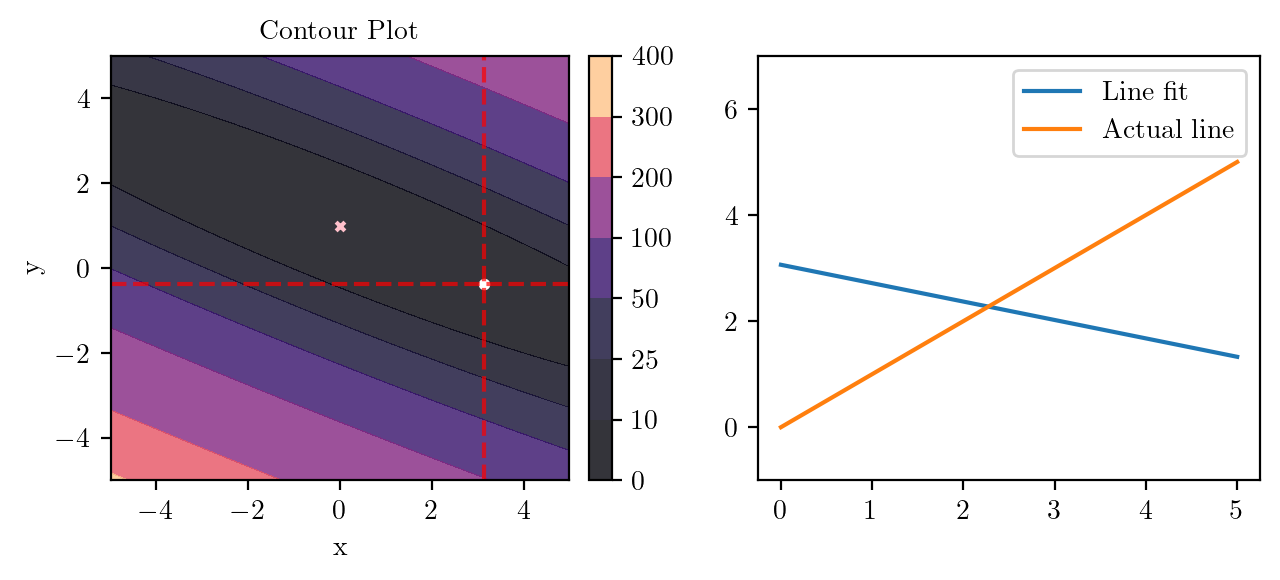

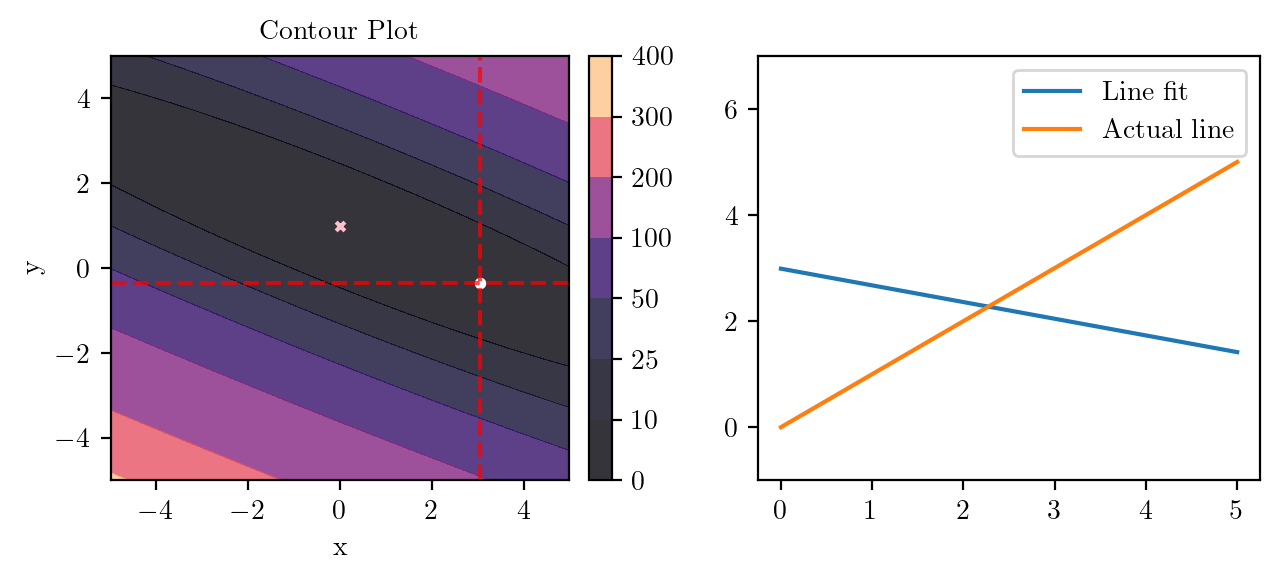

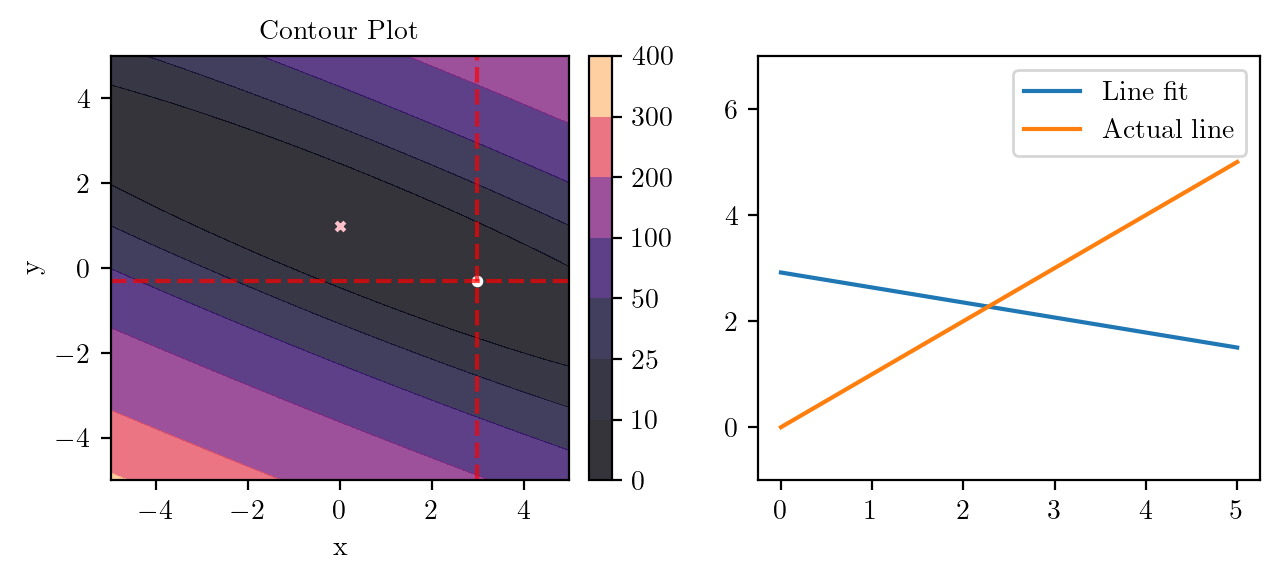

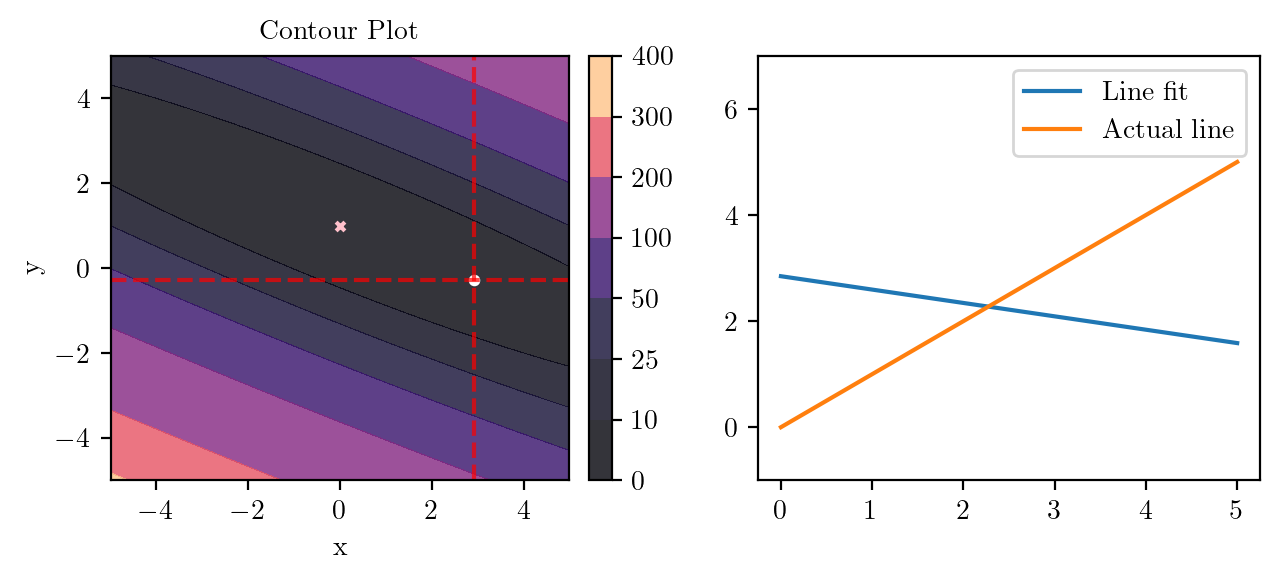

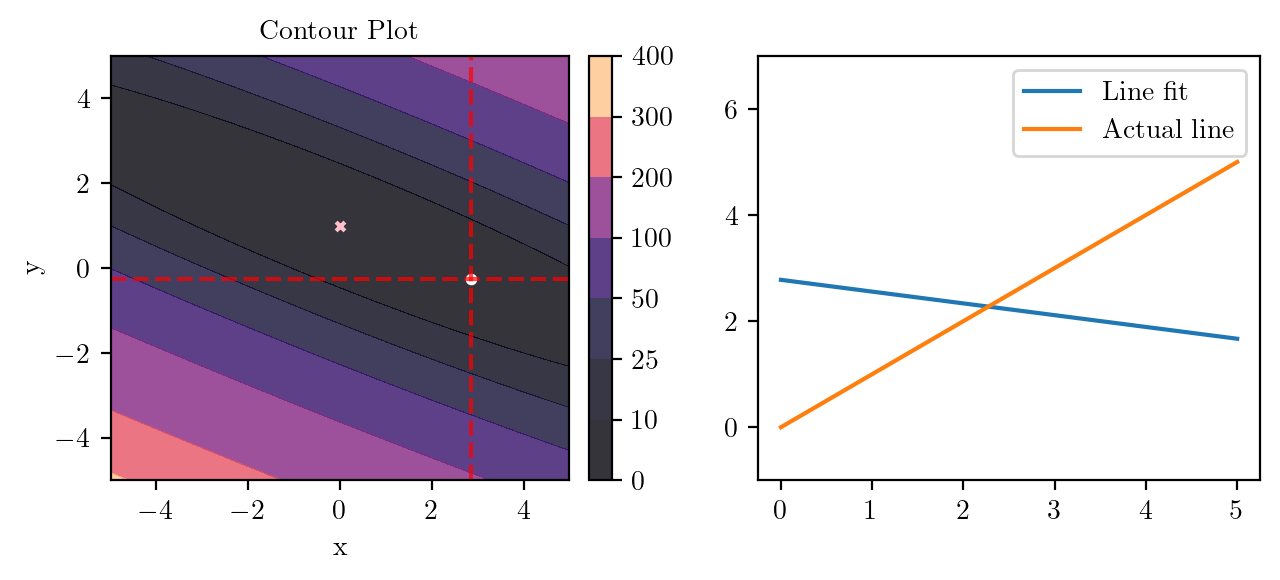

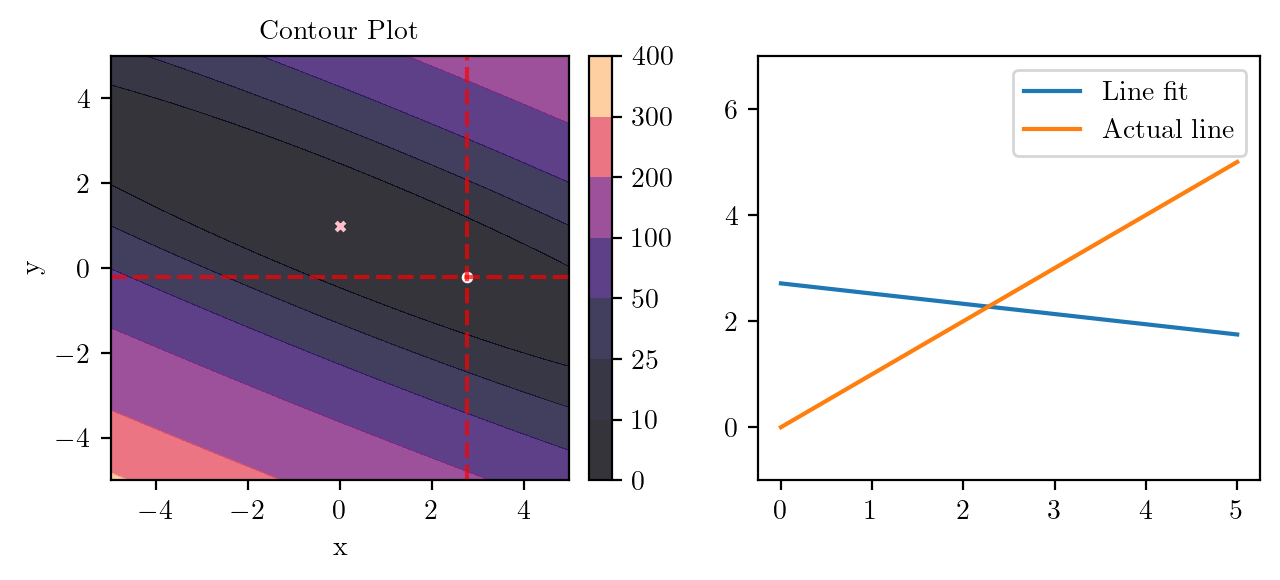

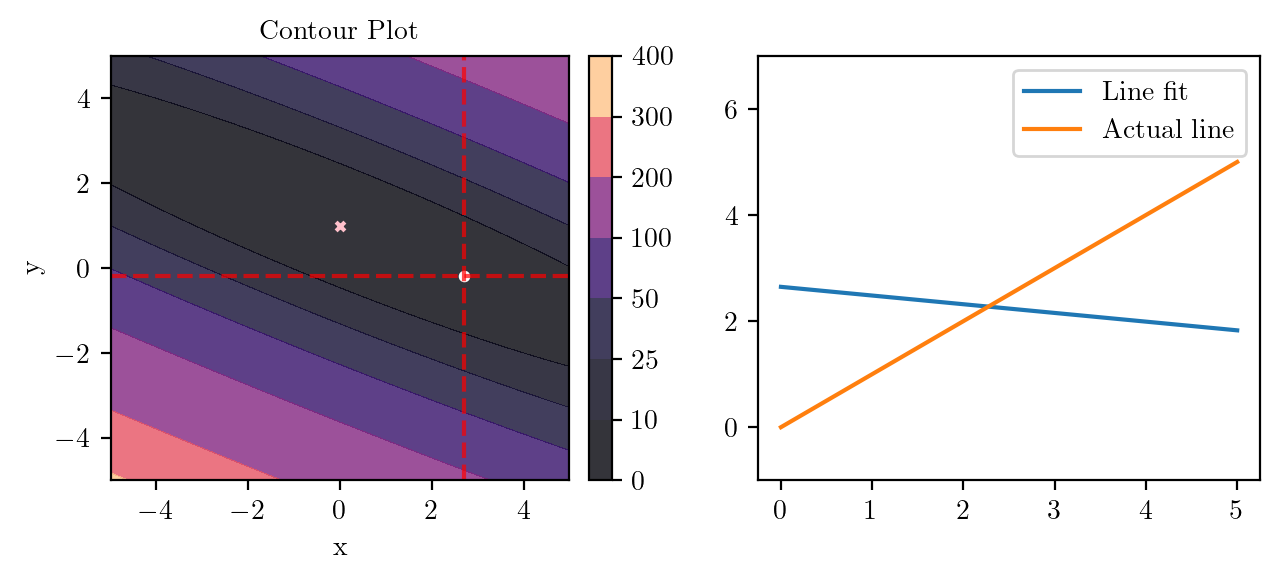

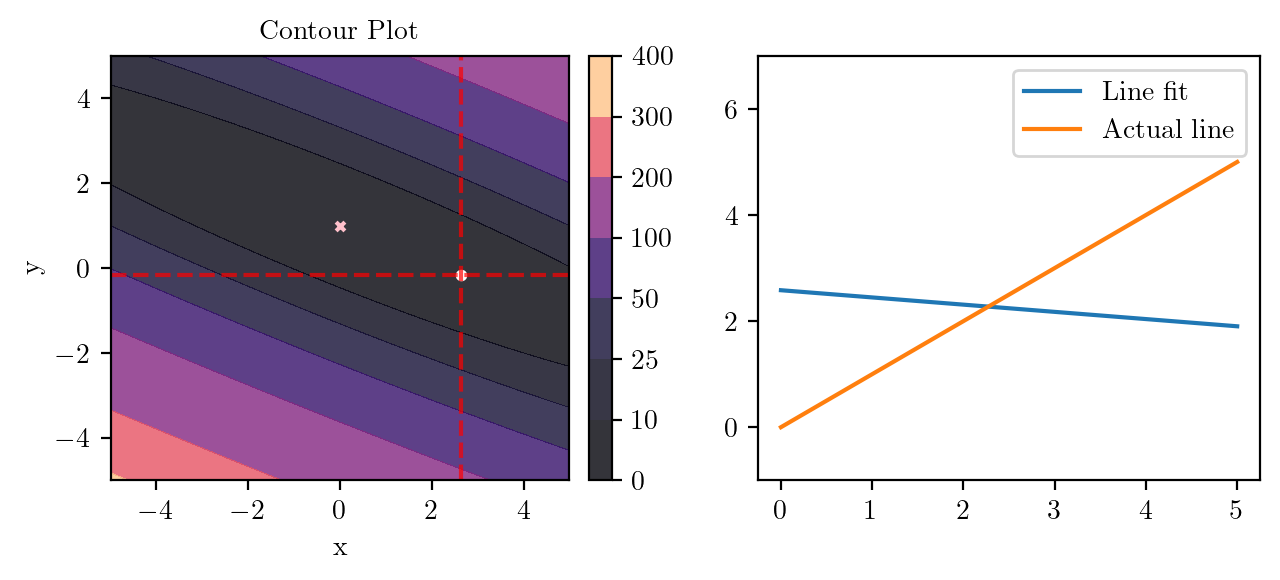

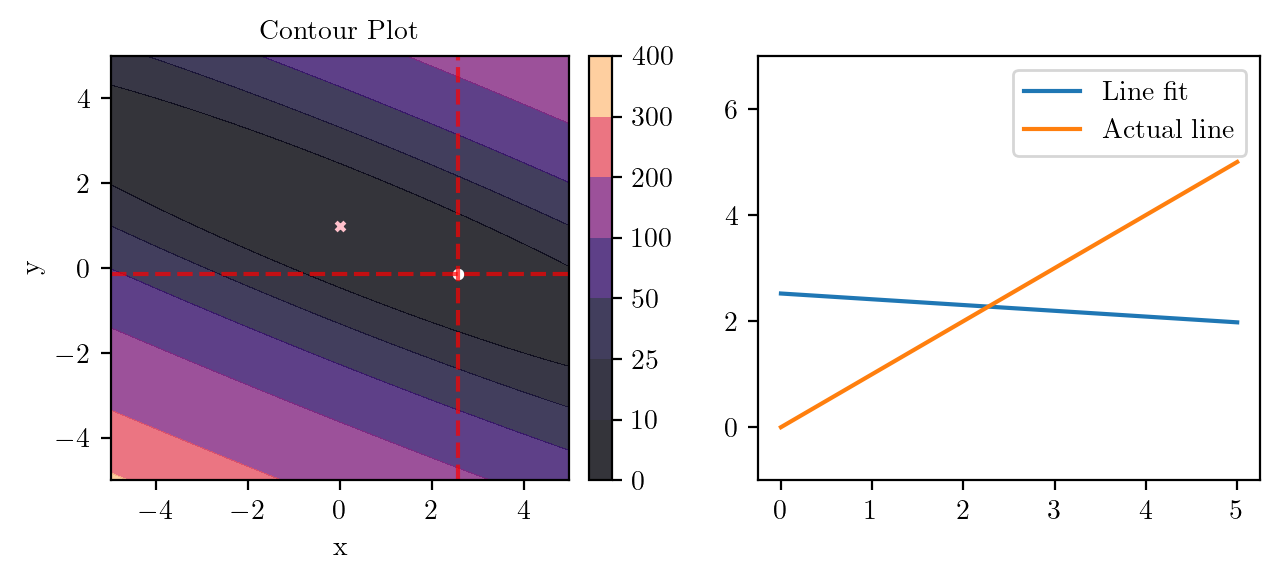

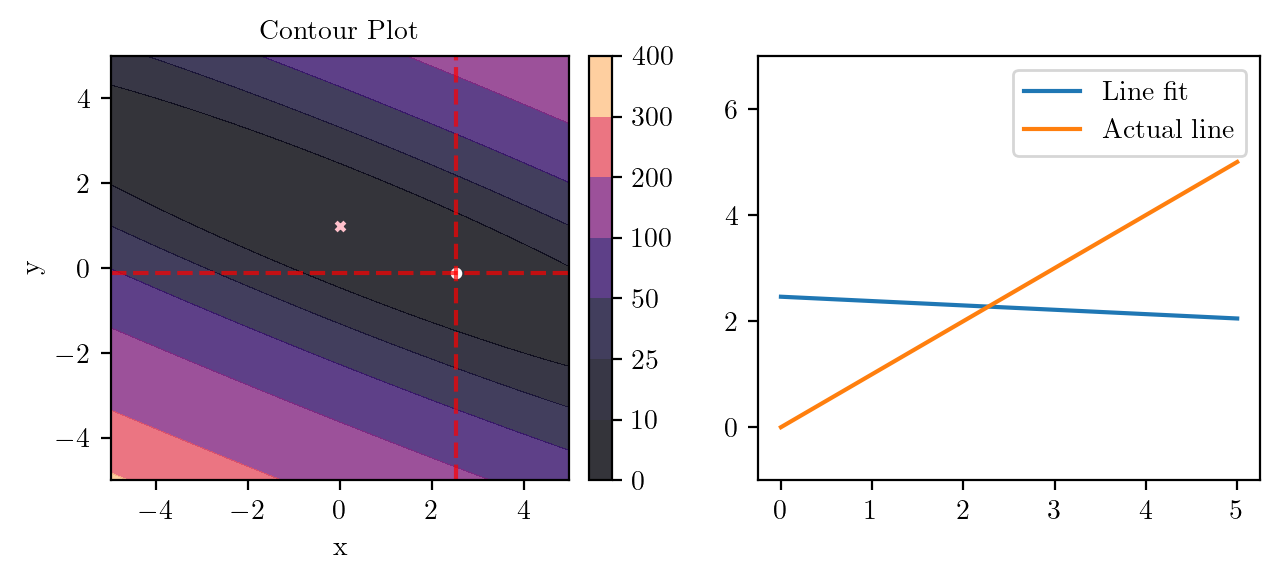

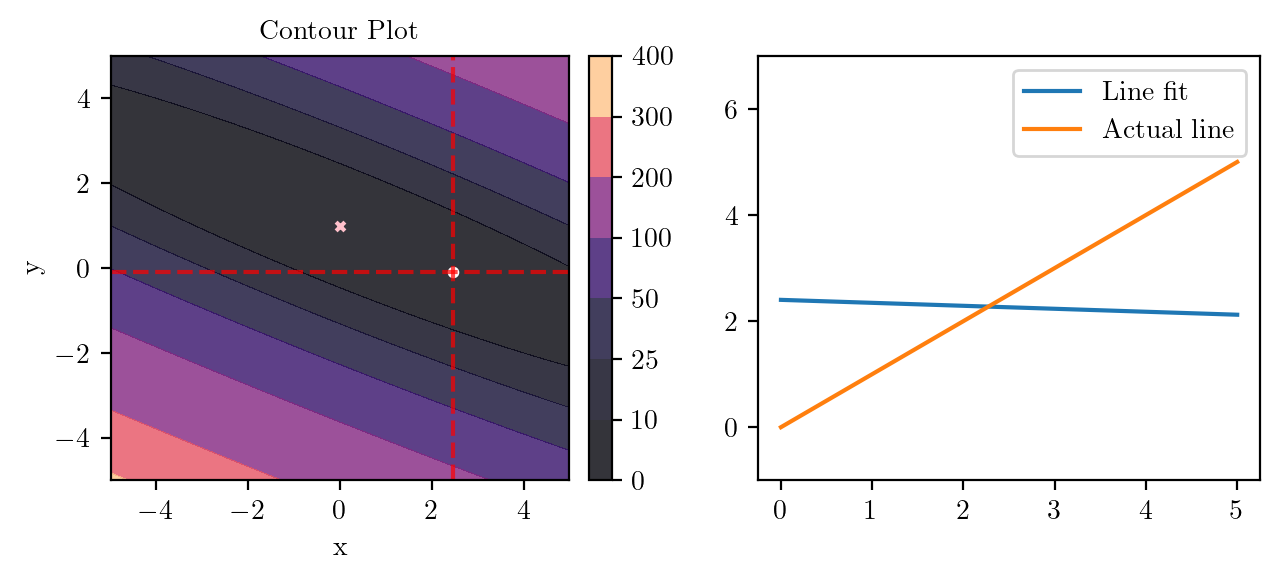

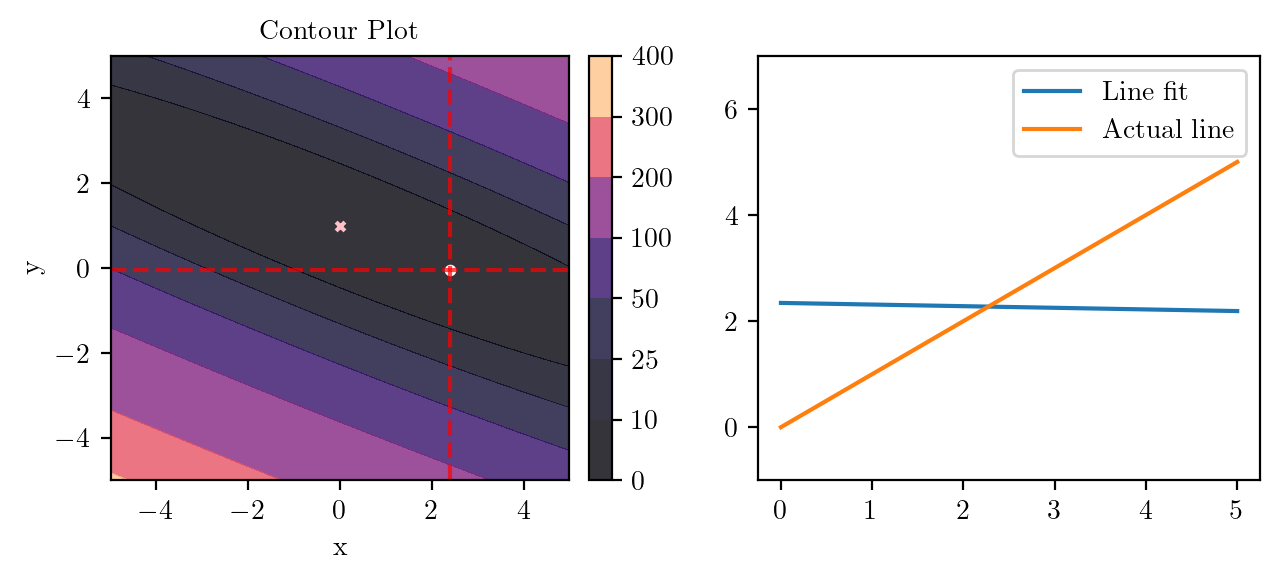

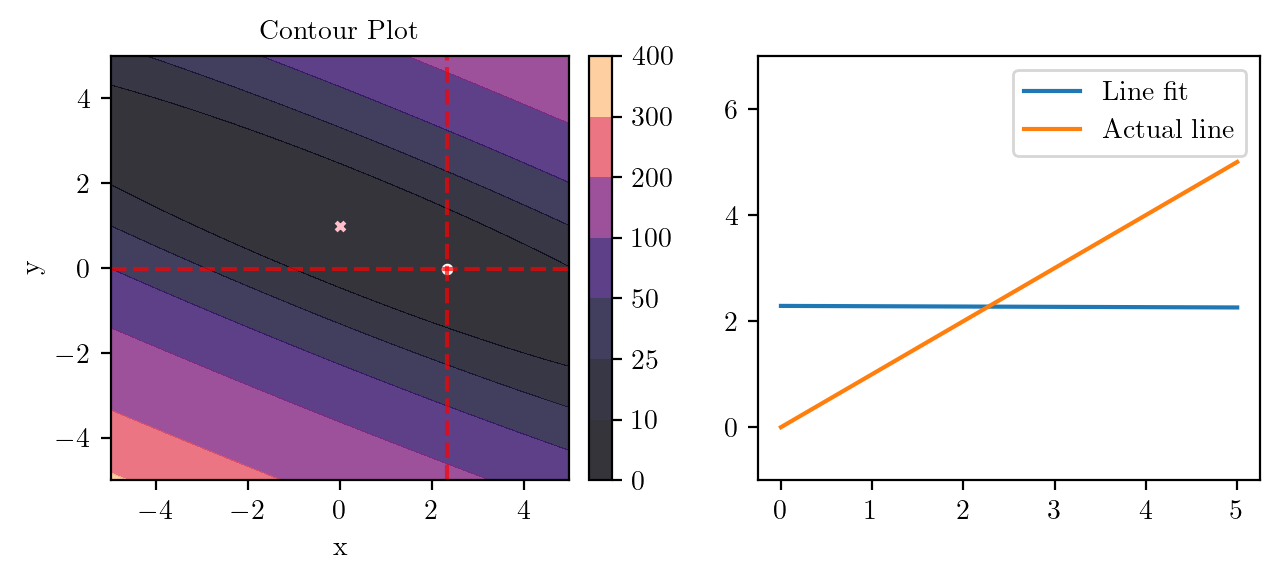

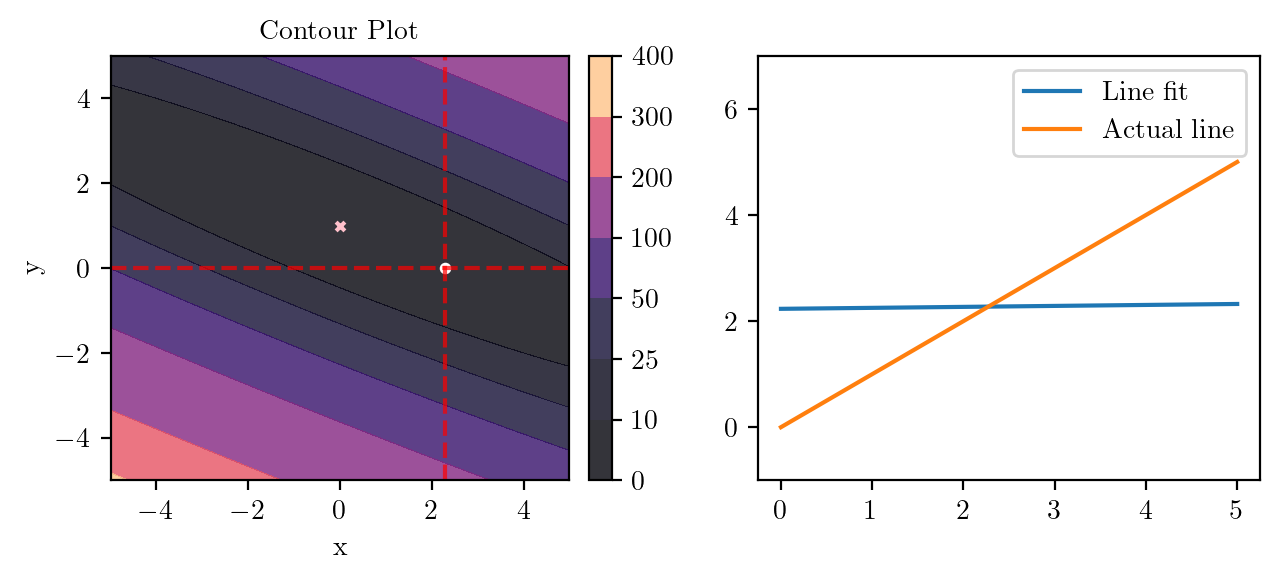

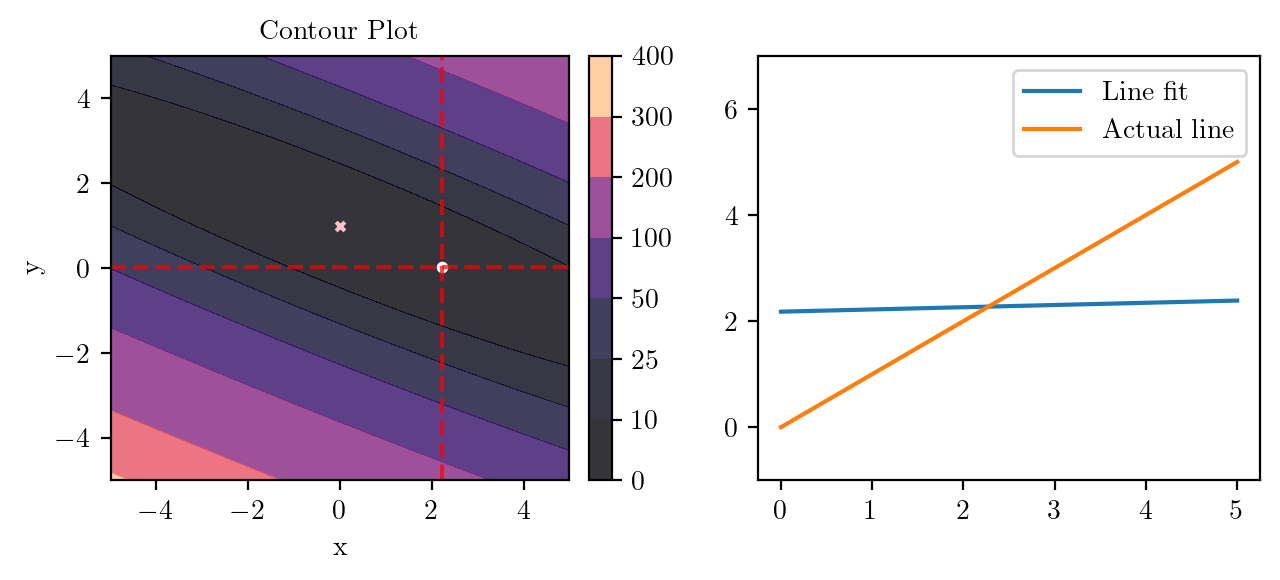

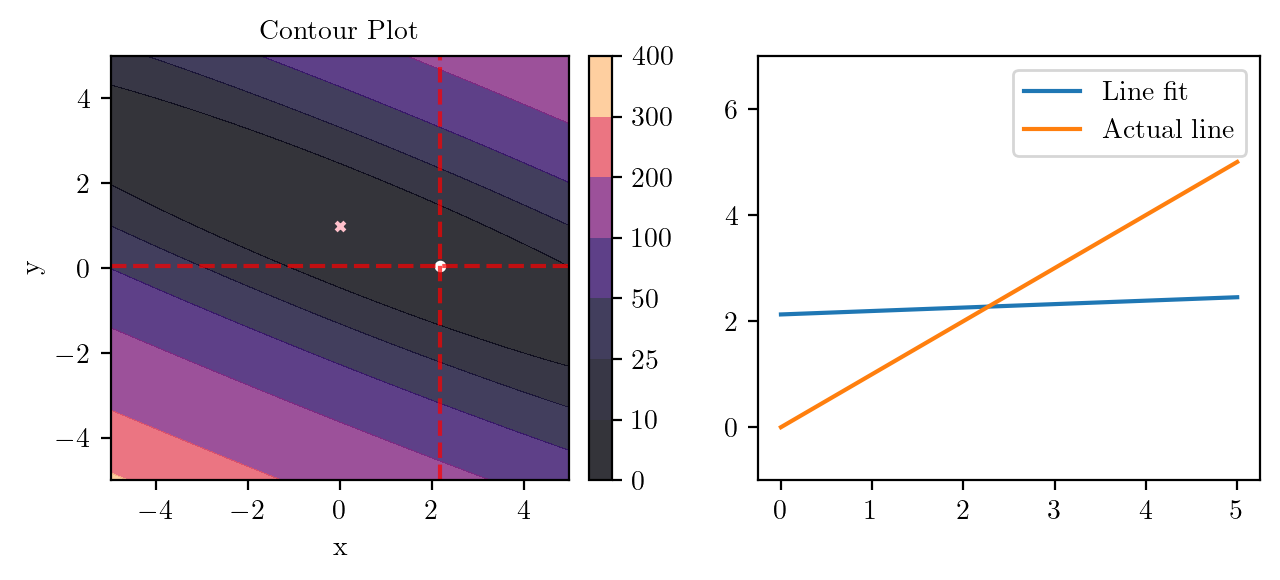

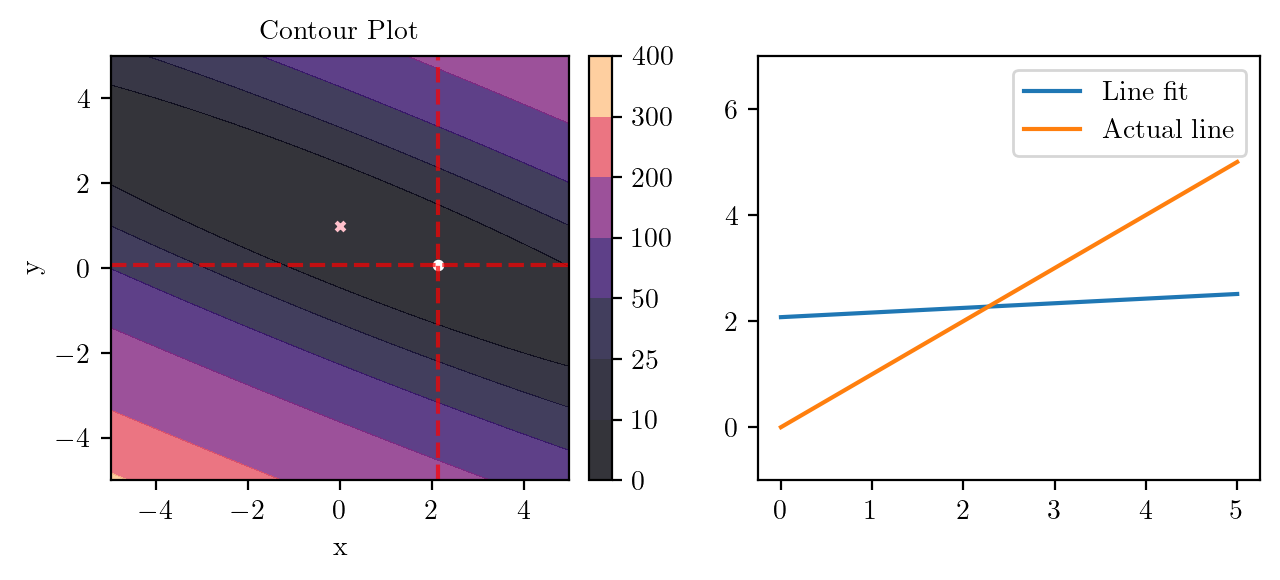

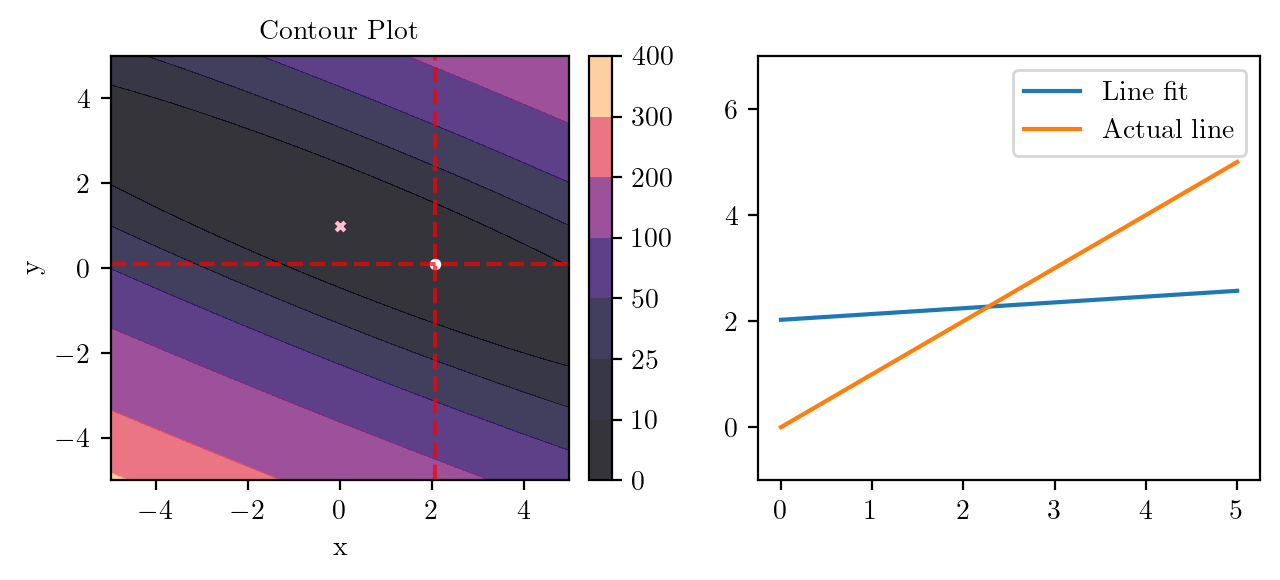

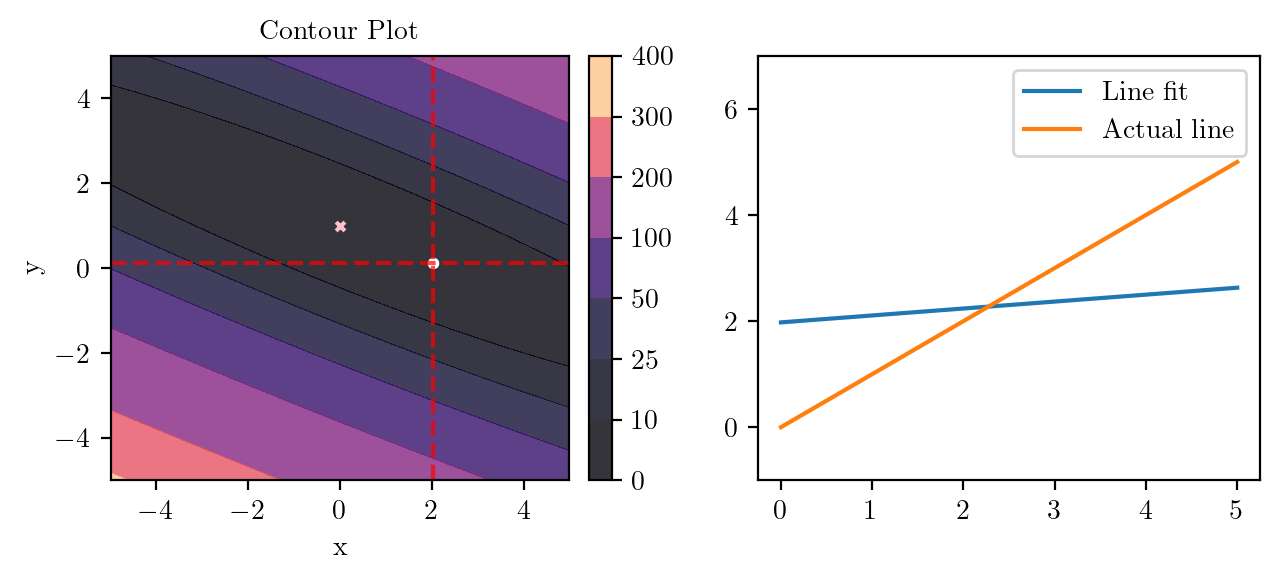

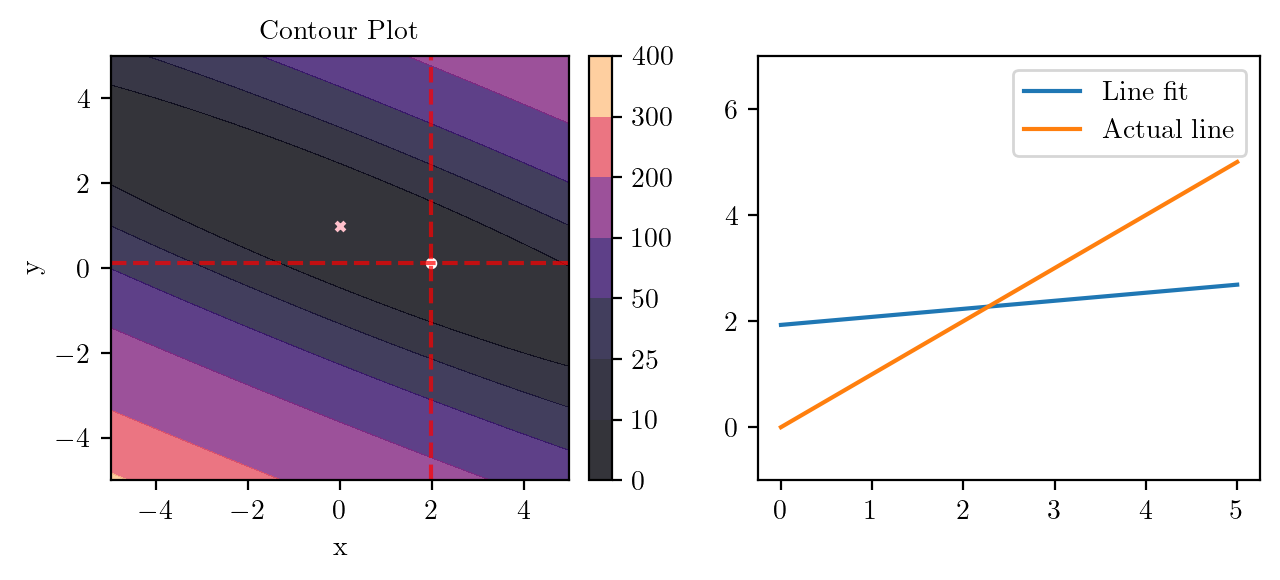

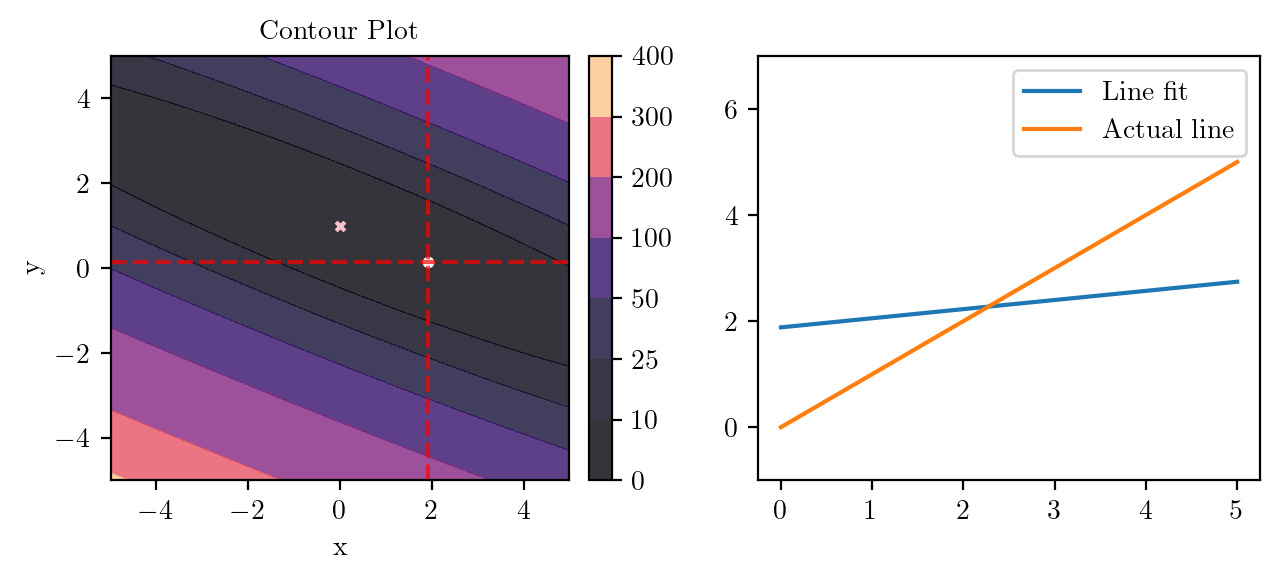

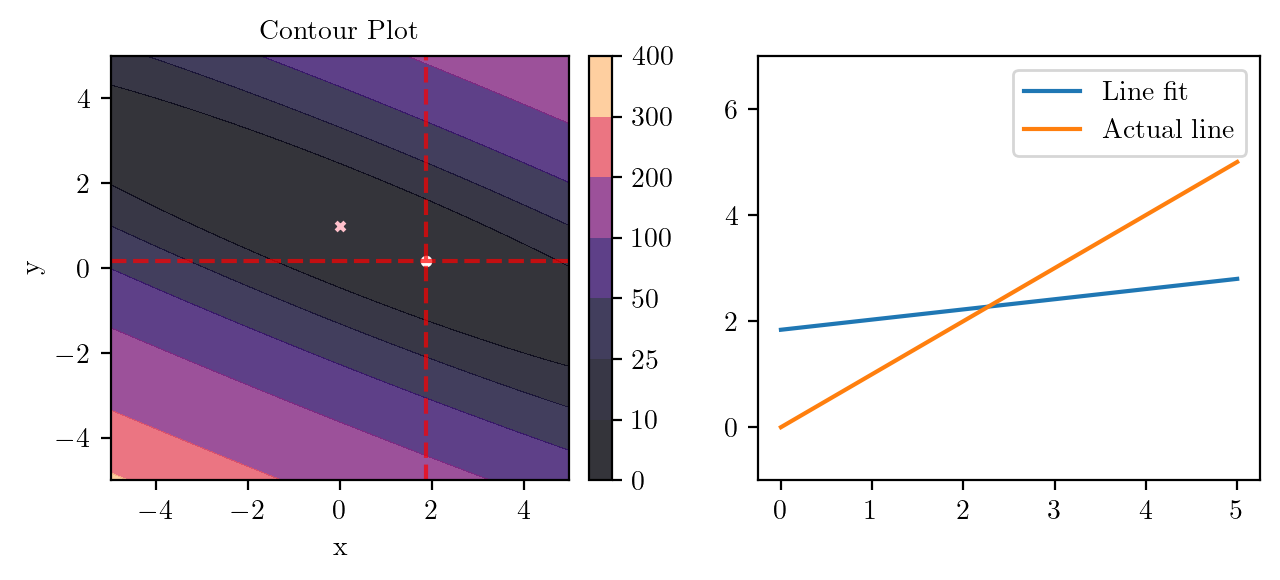

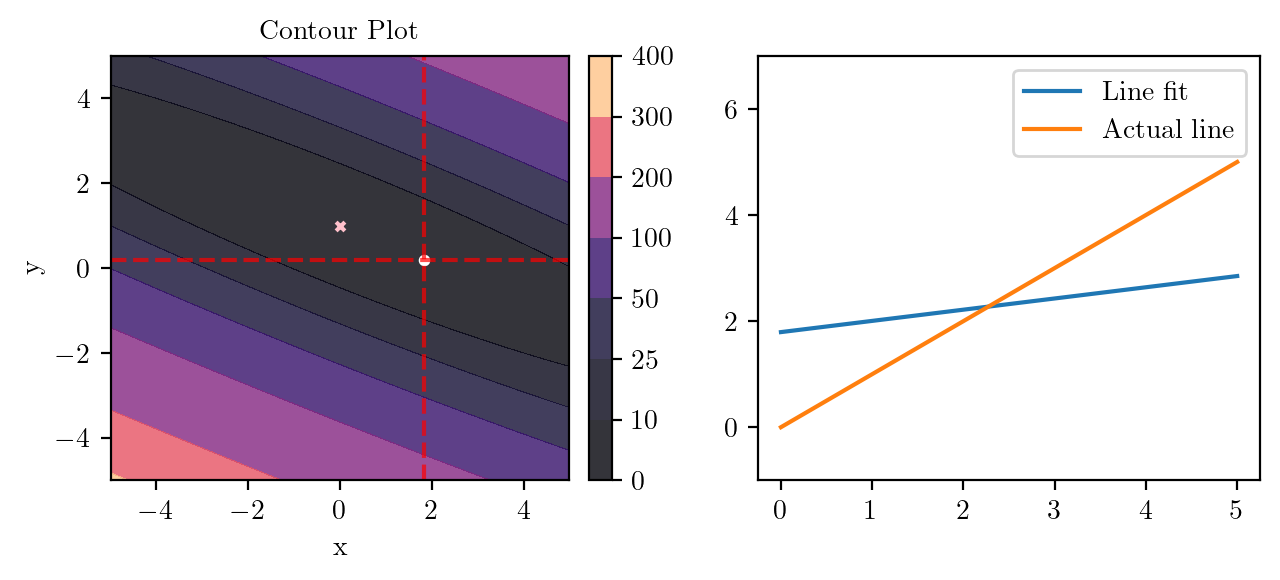

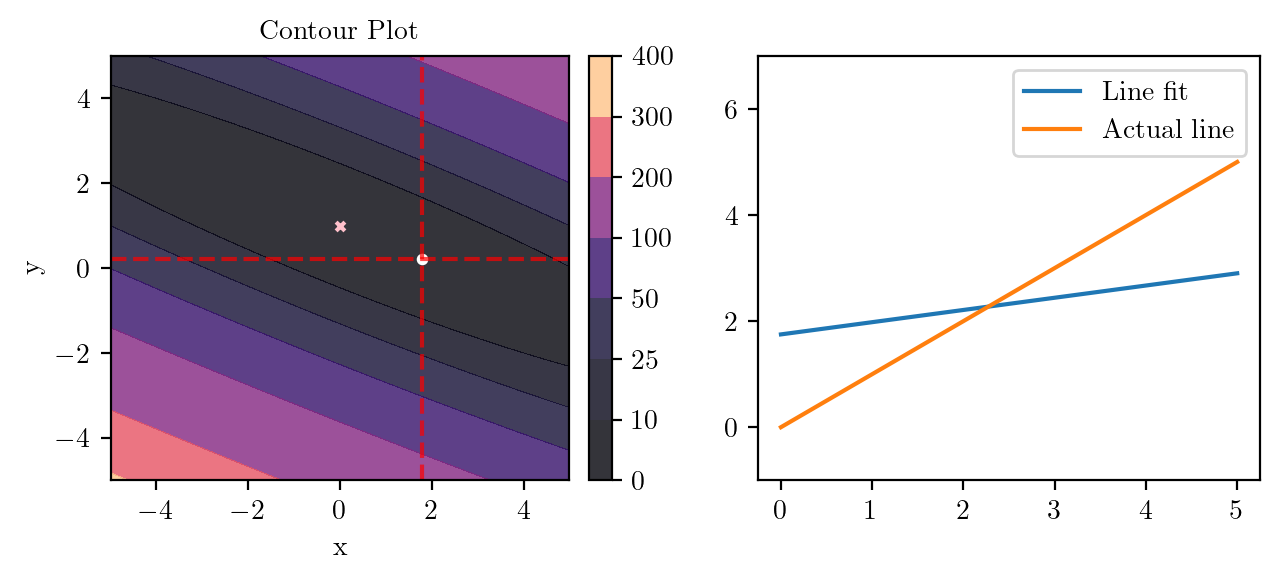

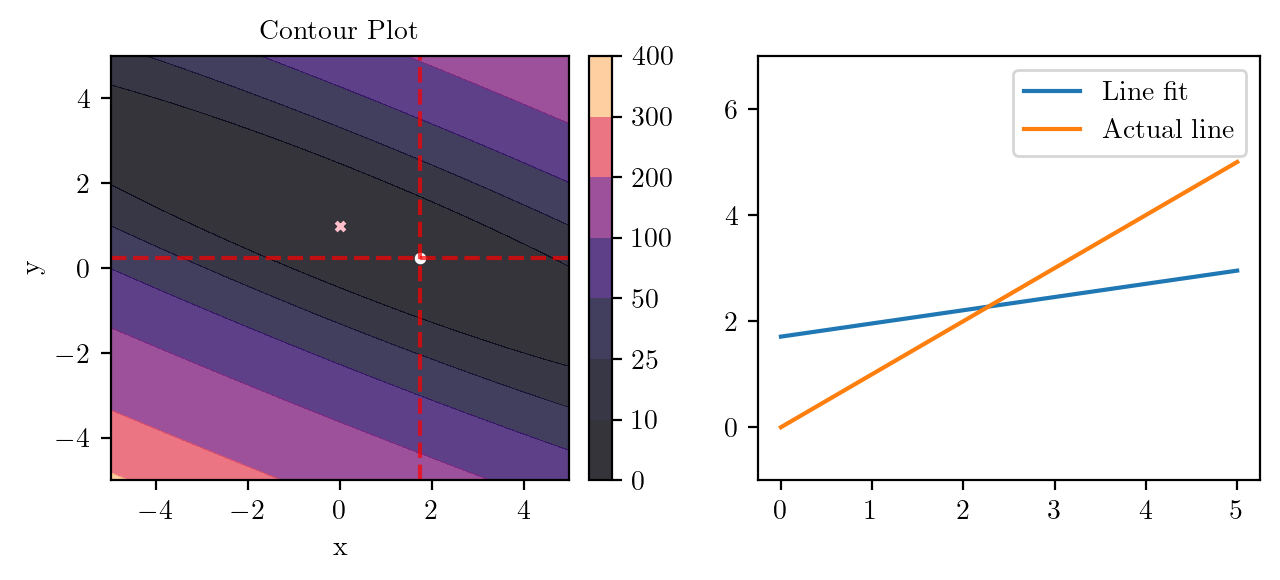

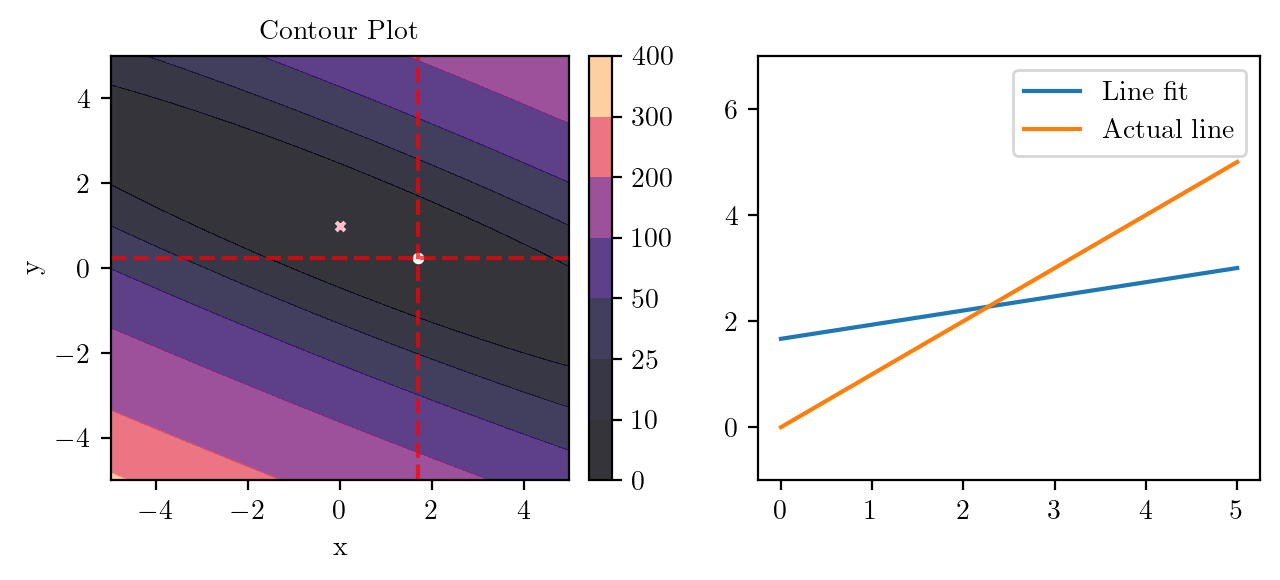

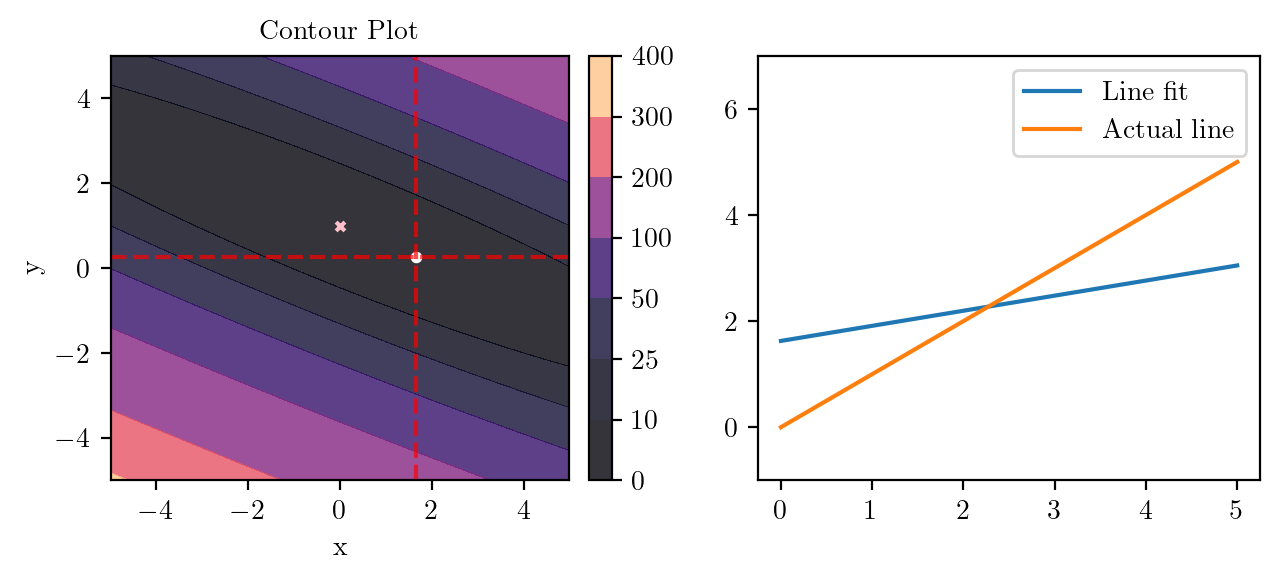

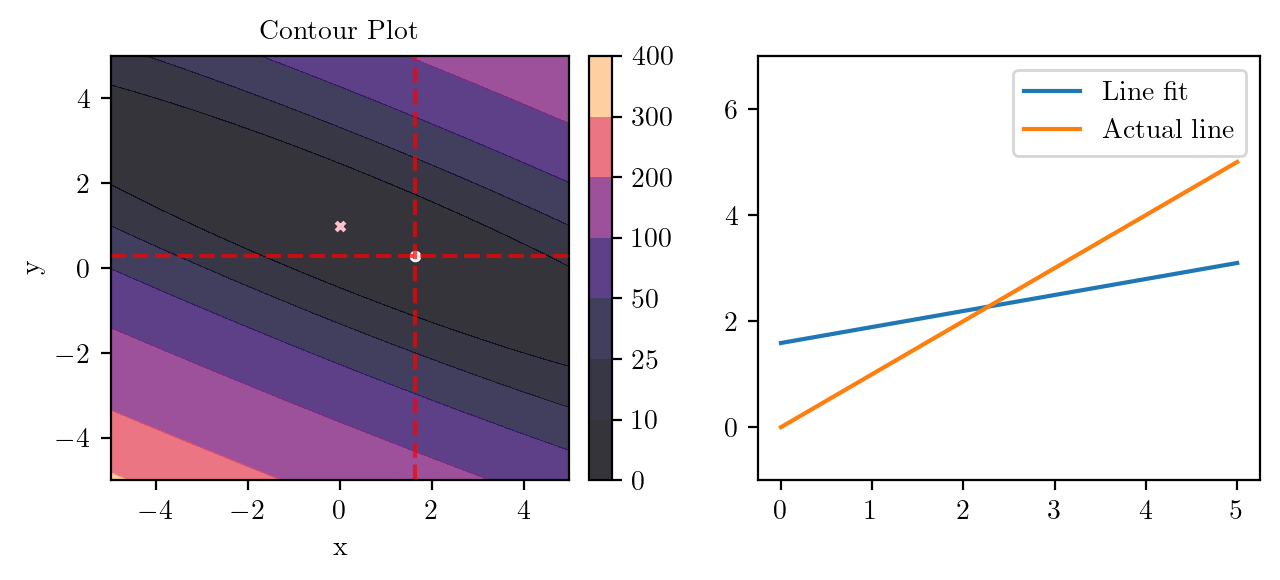

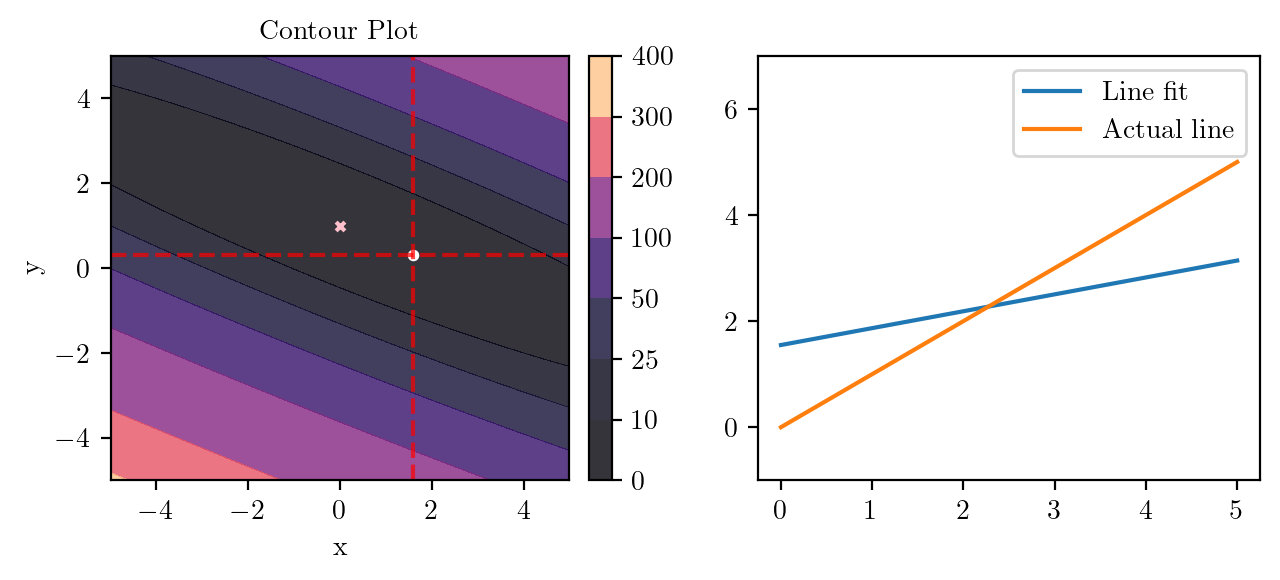

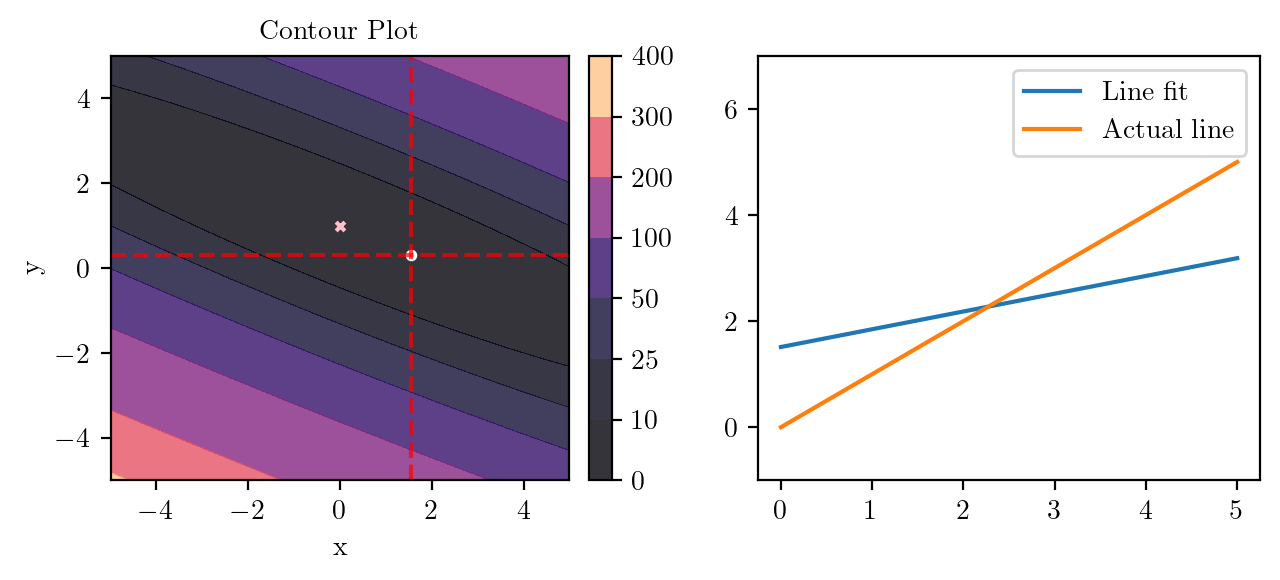

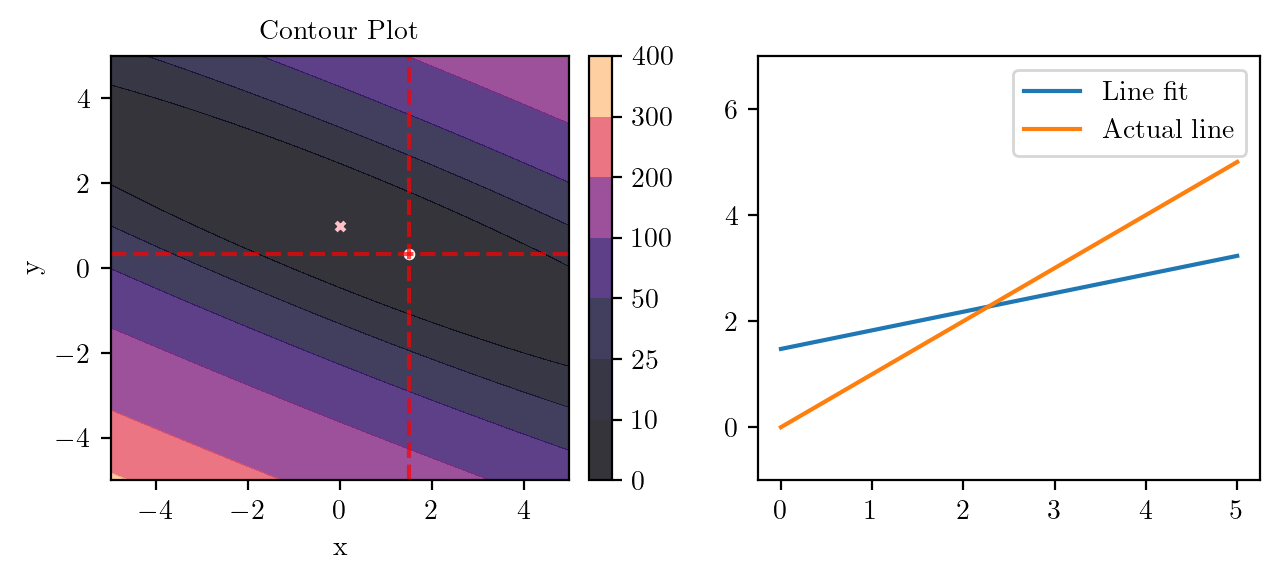

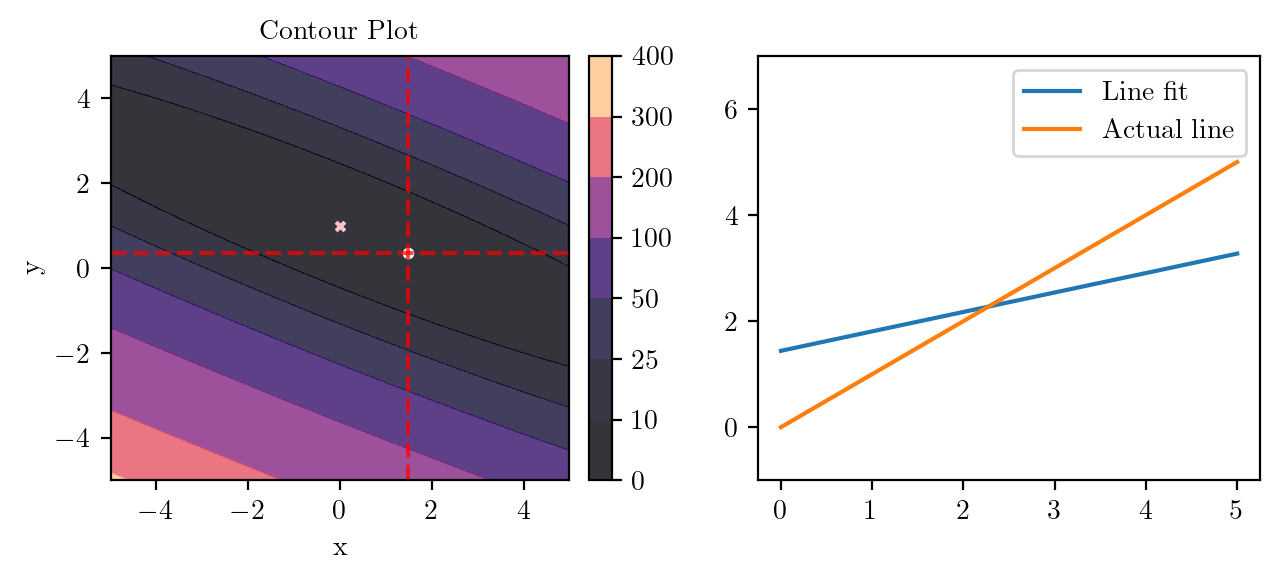

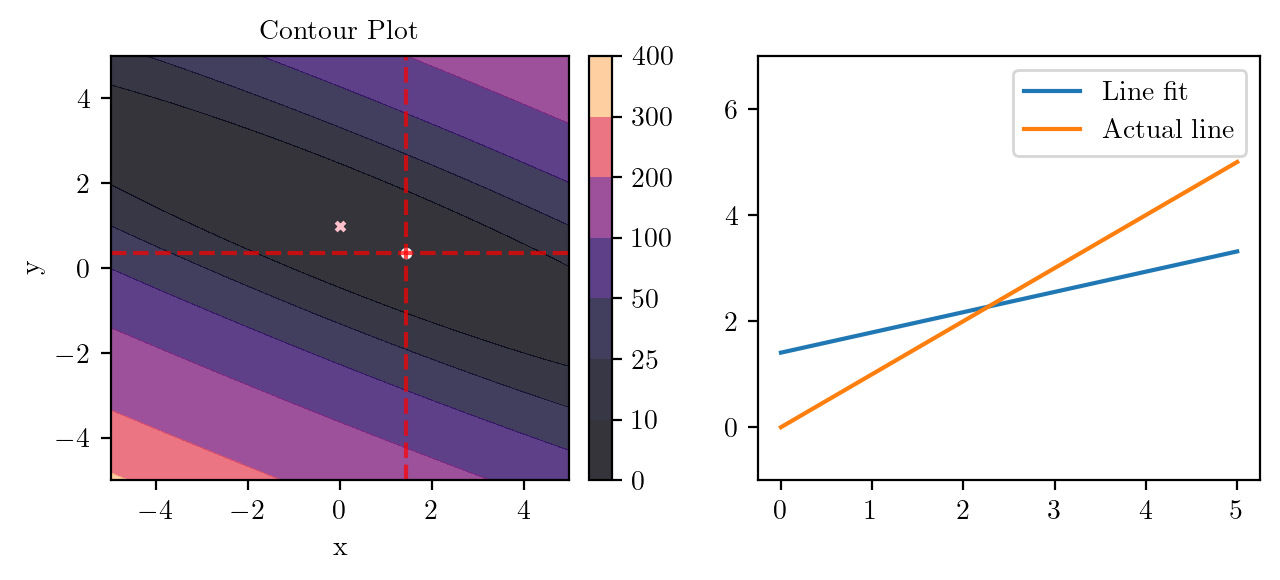

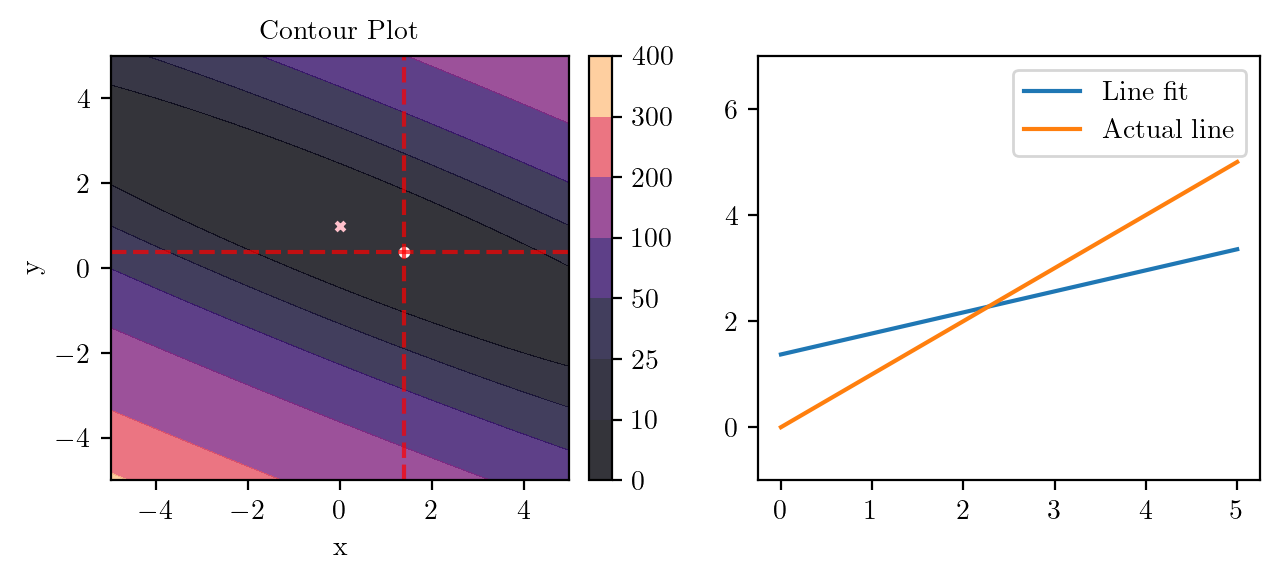

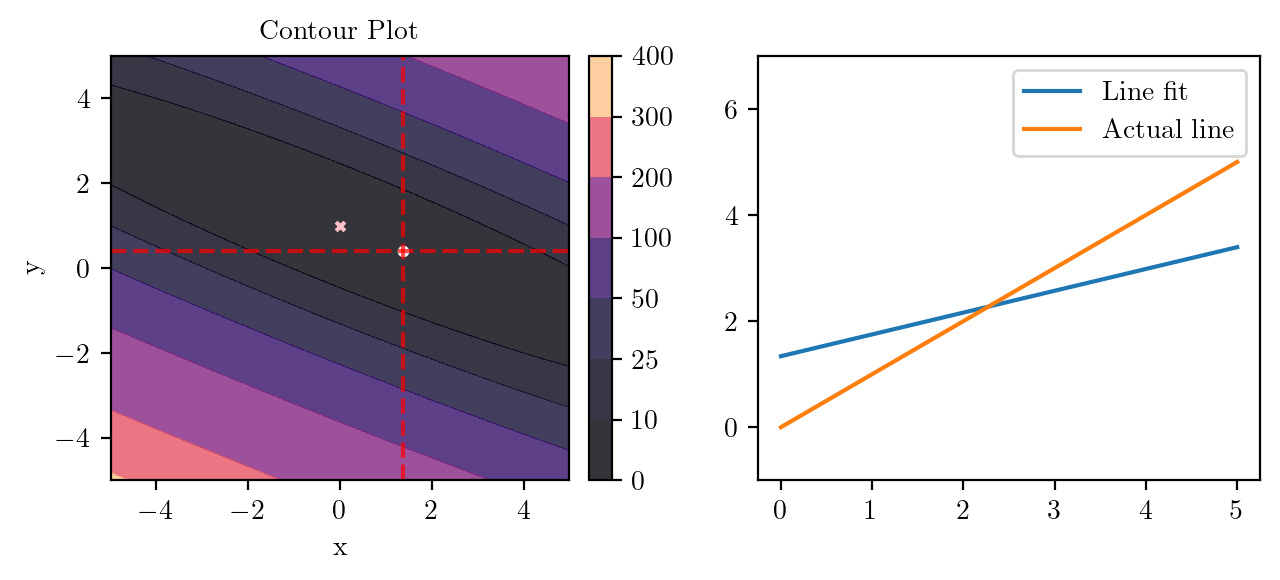

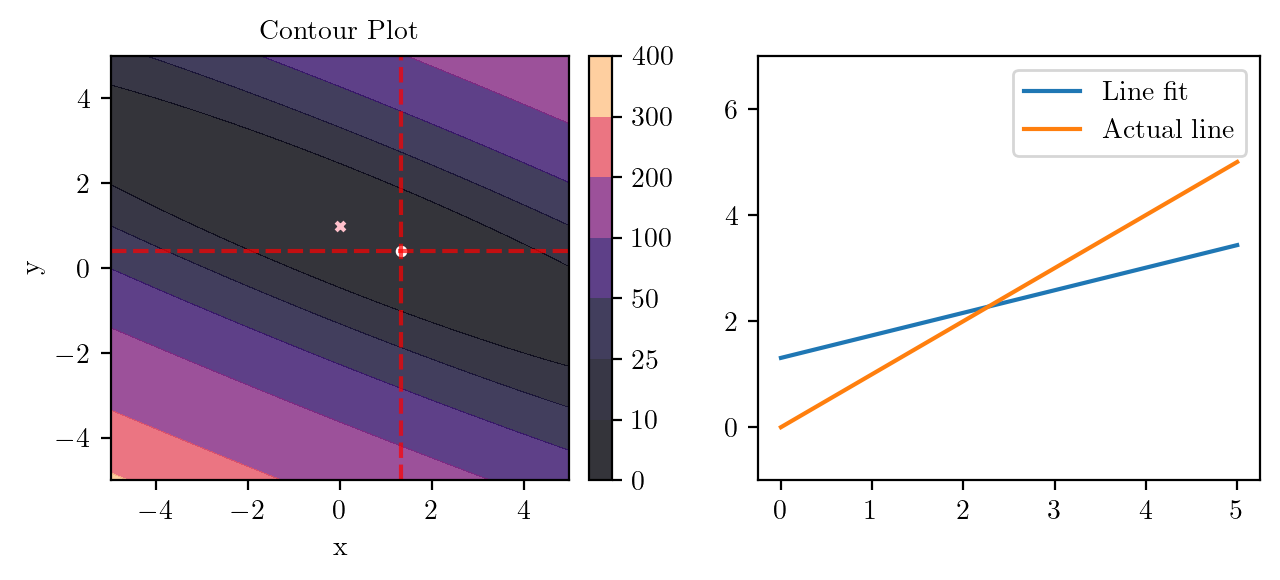

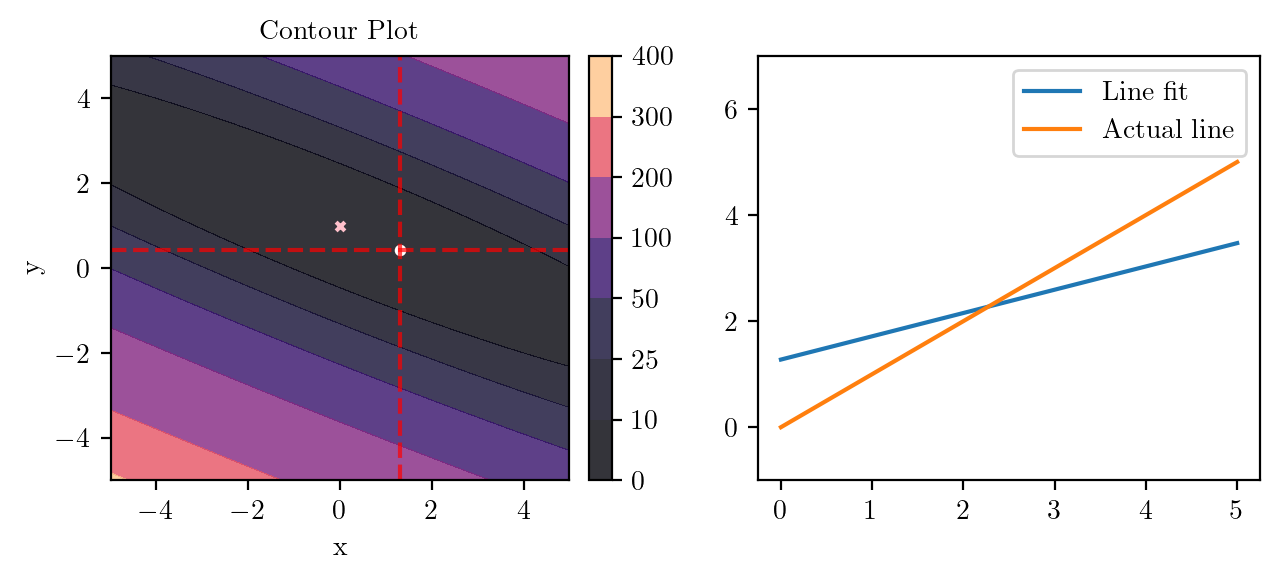

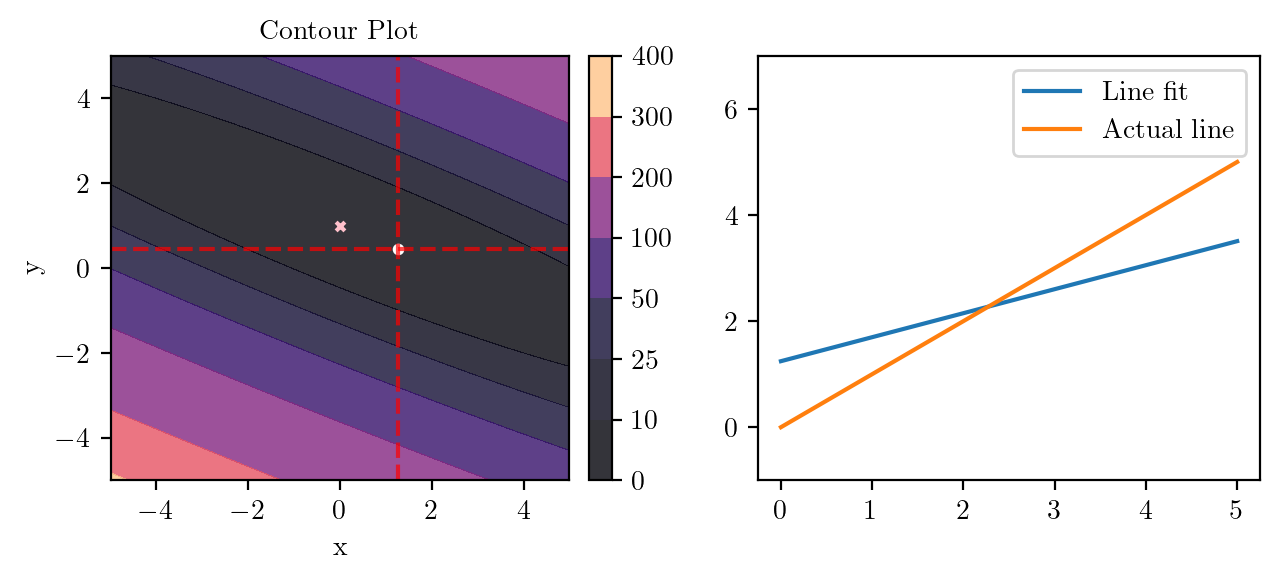

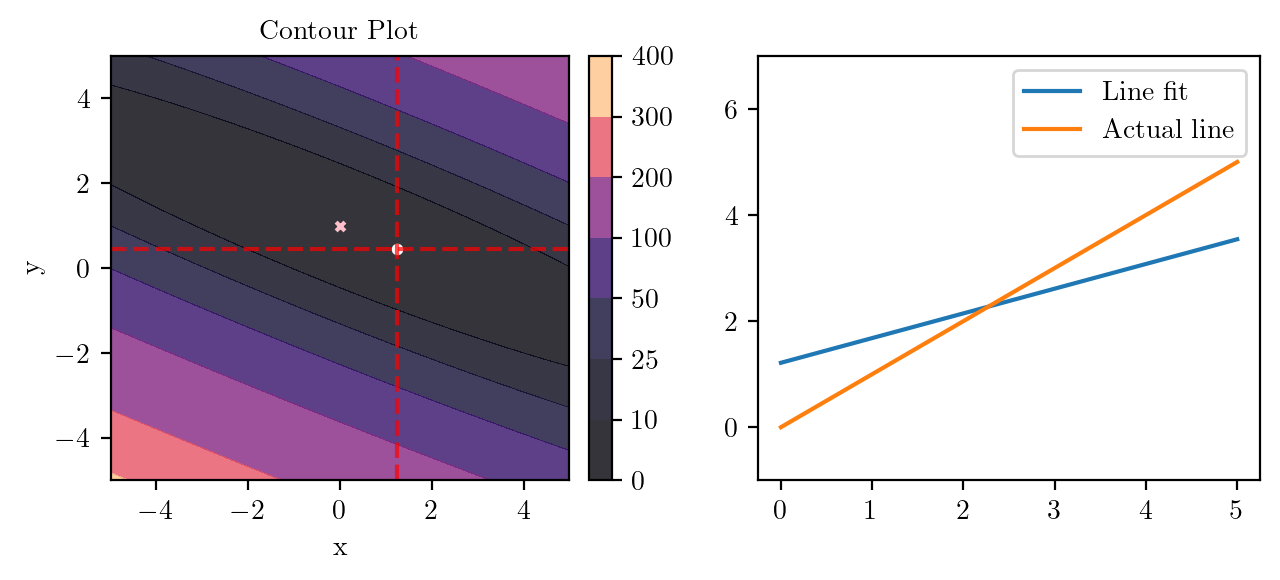

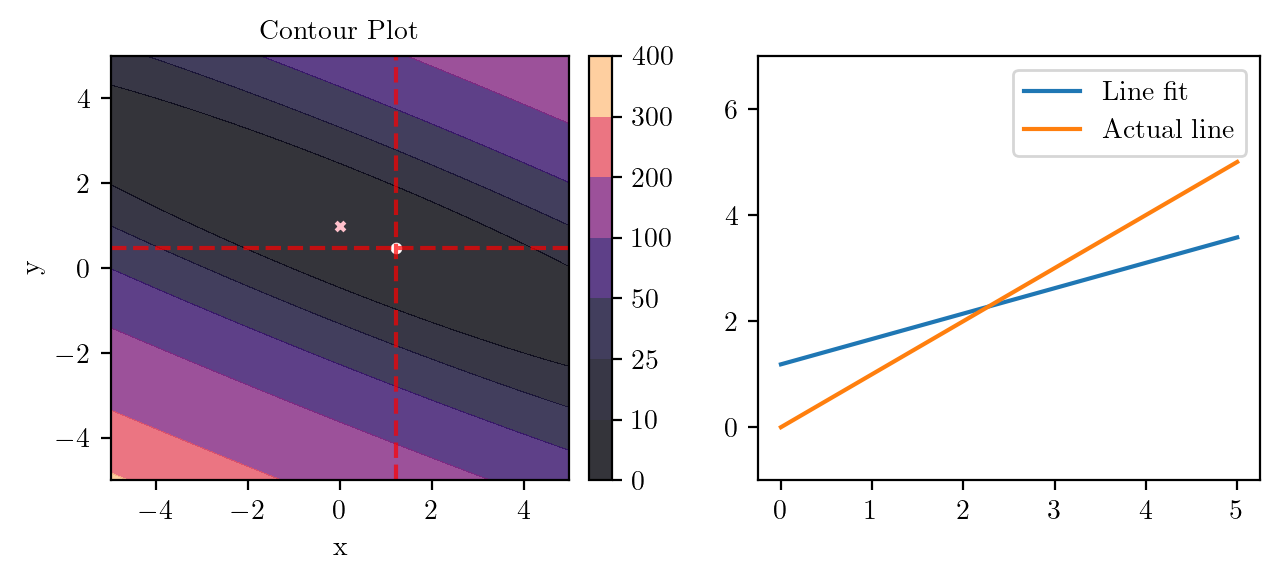

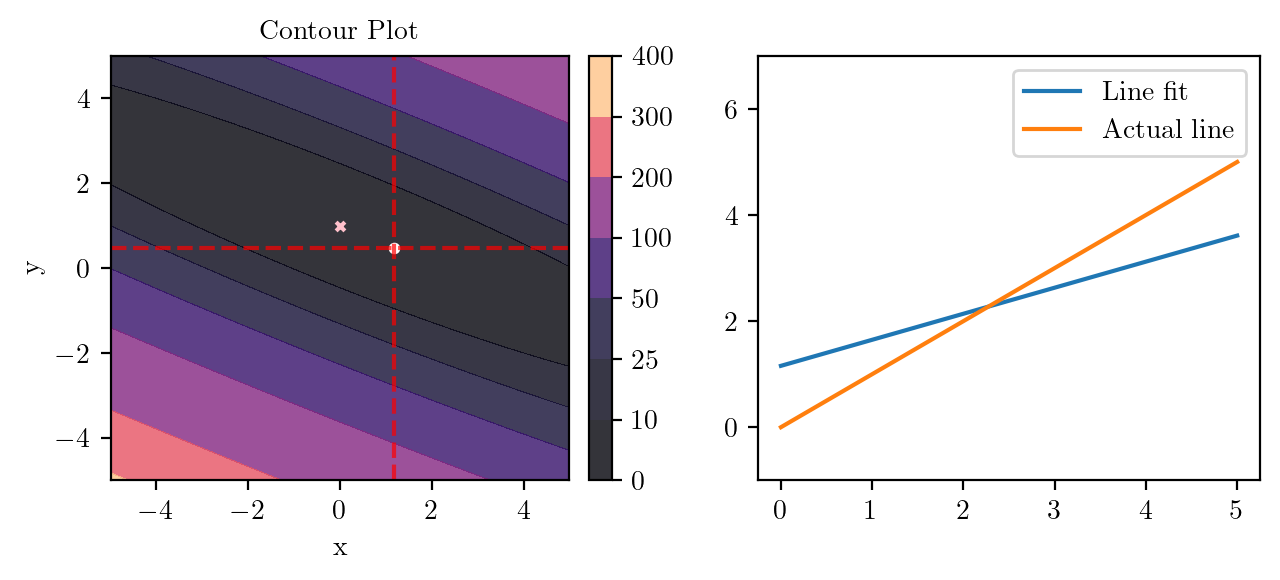

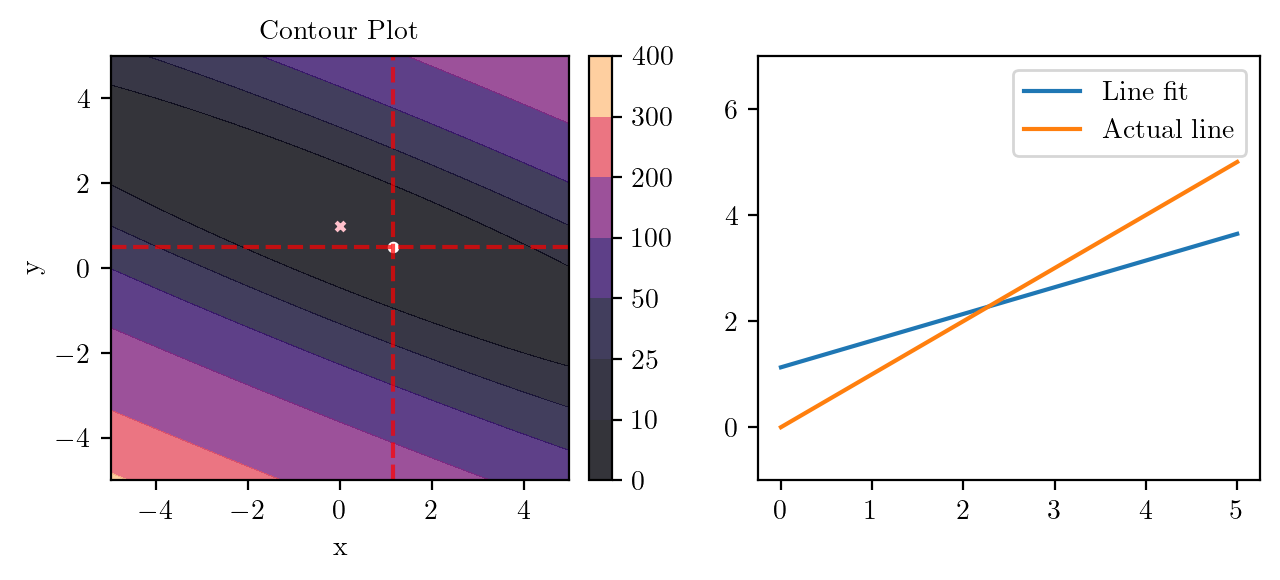

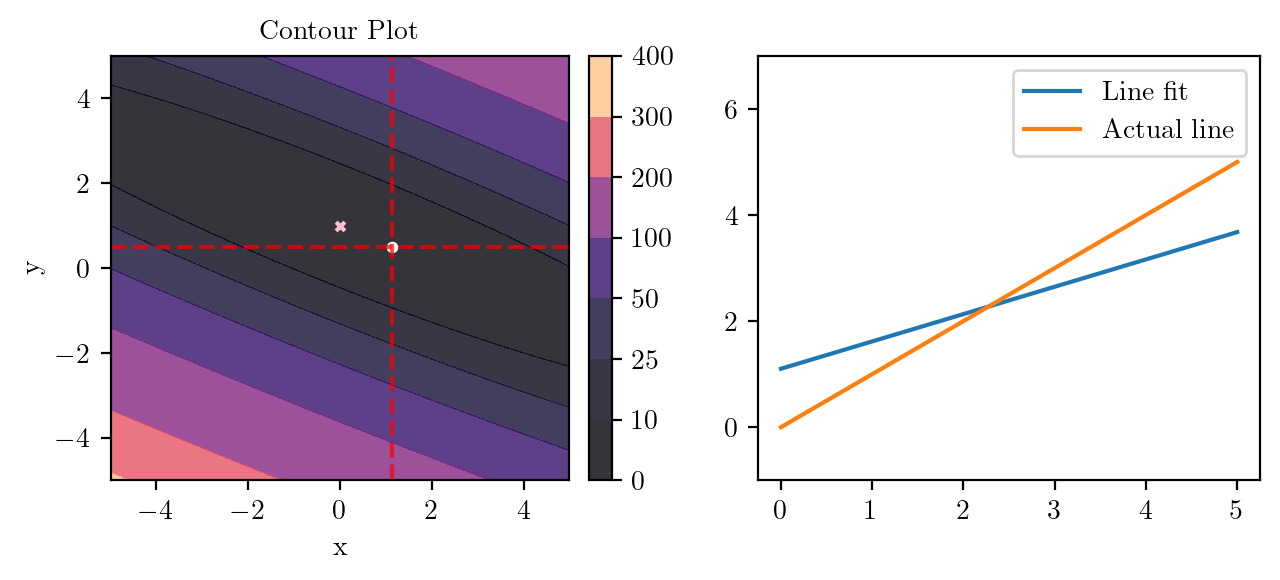

In [121]:
latexify(columns=2, fig_width=6.5, fig_height=3)
X, Y, Z, X_torch, Y_torch = create_XYZ(f)
levels = [0, 10, 25, 50, 100, 200, 300, 400]

xi = x0
yi = y0
alpha = 0.1
for i in range(50):
    fig, ax = plt.subplots(ncols=2)
    _, _ = create_contour(X, Y, Z, ax[0], alpha=0.8, scatter_pts=(xi, yi), filled=True, levels=levels)
    # Mark the minima with horizontal and vertical lines
    ax[0].axhline(y=yi, color='red', linestyle='--', alpha=0.7)
    ax[0].axvline(x=xi, color='red', linestyle='--', alpha=0.7)
    ax[0].scatter([0], [1], s=10, c='pink', marker='x', label='Minima')
    del_x, del_y = torch.func.grad(f, argnums=(0, 1))(xi, yi)
    xi = xi - alpha * del_x
    yi = yi - alpha * del_y
    print(xi, yi)
    
    # plot the line fit 
    x_line = np.linspace(0, 5, 100)
    y_line = xi + yi*x_line
    ax[1].plot(x_line, y_line, label='Line fit')
    ax[1].set_ylim(-1, 7)
    ax[1].plot(x_line, x_line, label='Actual line')
    ax[1].legend()
    
    plt.tight_layout()
    plt.savefig(f"../figures/mml/gradient-descent-{i}.pdf", bbox_inches="tight")





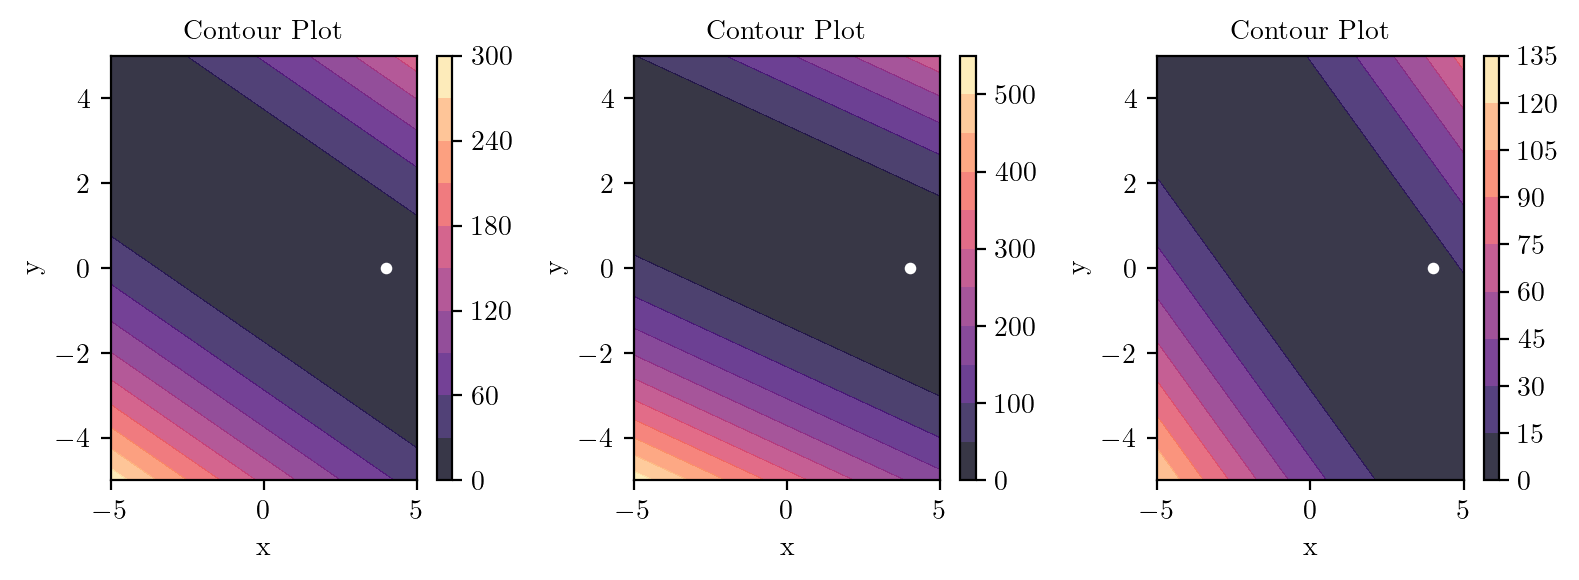

In [7]:
levels = 10
def f1(x, y):
    return (2-x-2*y)**2

def f2(x, y):
    return (3-x-3*y)**2

def f3(x, y):
    return (1-x-y)**2

x0, y0 = torch.tensor(4.0), torch.tensor(0.0)


fig, ax = plt.subplots(ncols=3, figsize=(8, 3))
X, Y, Z, X_torch, Y_torch = create_XYZ(f1)
_, _ = create_contour(X, Y, Z, ax[0], alpha=0.8, scatter_pts=(x0, y0), filled=True, levels=levels)

X, Y, Z, X_torch, Y_torch = create_XYZ(f2)
_, _ = create_contour(X, Y, Z, ax[1], alpha=0.8, scatter_pts=(x0, y0), filled=True, levels=levels)

X, Y, Z, X_torch, Y_torch = create_XYZ(f3)
_, _ = create_contour(X, Y, Z, ax[2], alpha=0.8, scatter_pts=(x0, y0), filled=True, levels=levels)

fig.tight_layout()
plt.savefig(f"../figures/mml/gradient-descent-3-functions.pdf", bbox_inches="tight")

In [10]:
X, Y, Z, X_torch, Y_torch = create_XYZ(f1)
alpha = 0.1


In [11]:
del_x, del_y = torch.func.grad(f1, argnums=(0, 1))(x0, y0)
x1 = x0 - alpha * del_x
y1 = y0 - alpha * del_y

print(x1, y1)

tensor(3.6000) tensor(-0.8000)

In [12]:
del_x, del_y = torch.func.grad(f2, argnums=(0, 1))(x1, y1)
x2 = x1 - alpha * del_x
y2 = y1 - alpha * del_y

print(x2, y2)

tensor(3.9600) tensor(0.2800)

In [13]:
del_x, del_y = torch.func.grad(f3, argnums=(0, 1))(x2, y2)
x3 = x2 - alpha * del_x
y3 = y2 - alpha * del_y

print(x3, y3)

tensor(3.3120) tensor(-0.3680)